# Project RiskLens: Predicting Startup Success Using Machine Learning
## Data Science for Business: Technical (TECH-GB 2336-30)
## NYU Stern School of Business — Spring 2025

---

### **Group G10:**
- **Rugved Mhatre** (rrm9598@nyu.edu)
- **Sakshee Sawant** (ss18198@nyu.edu)
- **Yash Jain** (yj3273@nyu.edu)

---

### **Instructor:**  
**Chris Volinsky**   
NYU Stern School of Business

---

### **Submission Date:**  
May 5th 2025

---

#**1. Business Understanding**

**Business Problem:**  
Sequoia Capital, a leading venture capital firm, faces a high-risk environment when investing in startups. Predicting which startups are more likely to succeed (via IPO or M&A) can significantly reduce investment risks and maximize returns.

**Business Value:**  
An accurate predictive model would allow investment teams to prioritize startups with the highest likelihood of success, thereby optimizing portfolio allocation and boosting firm profitability.

**Stakeholders:**  
The primary users are Sequoia Capital's Investment Strategy Team, Analysts, and Executive Board Members.

# **2. Data Understanding & Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

## Initial Cleaning of Dataset

In [ ]:
df = pd.read_csv('StartupInvestments.csv', encoding='ISO-8859-1')

In [ ]:
df.shape

(54294, 39)

In [ ]:
# Clean column names: lowercase, remove leading/trailing spaces, replace spaces with underscores
df.columns = (
    df.columns
    .str.strip()            # Remove leading/trailing spaces
    .str.lower()            # Convert all to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.replace('-', '_')  # Replace hyphens with underscores
)

In [ ]:
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','')     # removing commas from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')     # removing extra space from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0')    # removing - from funding_total_usd column and replacing with 0


df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])        # turning column to number

#turning all date columns in to date
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')              # conveting column into date and ignoring errors
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')    # conveting column into date and ignoring errors
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce')                # conveting column into date and ignoring errors
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')           # conveting column into date and ignoring errors

In [ ]:
df['diff_funding_weeks'] = (df['last_funding_at'] - df['first_funding_at'])/np.timedelta64(1, 'W') # turning the difference into months

In [ ]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [ ]:
import re

# Define a mapping of industry keyword lists to industry group names
industry_mapping = {
    "Administrative Services": admin_services,
    "Software": software,
    "Advertising": advertising,
    "Agriculture and Farming": agriculture,
    "Apps": app,
    "Artificial Intelligence": artificial_intelli,
    "Biotechnology": biotechnology,
    "Clothing and Apparel": clothing,
    "Commerce and Shopping": shopping,
    "Community and Lifestyle": community,
    "Consumer Electronics": electronics,
    "Consumer Goods": consumer_goods,
    "Content and Publishing": content,
    "Data and Analytics": data,
    "Design": design,
    "Education": education,
    "Energy": energy,
    "Events": events,
    "Financial Services": financial,
    "Food and Beverage": food,
    "Gaming": gaming,
    "Government and Military": government,
    "Hardware": hardware,
    "Health Care": health_care,
    "Information Technology": it,
    "Internet Services": internet,
    "Lending and Investments": invest,
    "Manufacturing": manufacturing,
    "Media and Entertainment": media,
    "Messaging and Telecommunication": message,
    "Mobile": mobile,
    "Music and Audio": music,
    "Natural Resources": resource,
    "Navigation and Mapping": navigation,
    "Payments": payment,
    "Platforms": platforms,
    "Privacy and Security": privacy,
    "Professional Services": services,
    "Real Estate": realestate,
    "Sales and Marketing": sales,
    "Science and Engineering": science,
    "Sports": sports,
    "Sustainability": sustainability,
    "Transportation": transportation,
    "Travel and Tourism": travel,
    "Video": video,
    "Other": other
}

# function to map industries
def assign_industry(market):
    for group, keywords in industry_mapping.items():
        if any(re.search(rf'\b{re.escape(word)}\b', str(market), flags=re.IGNORECASE) for word in keywords):
            return group
    return "Other"  # Default if no match

In [ ]:
# Note: Commenting this cell, as it takes really long time to run

# Apply the function
# df['Industry_Group'] = df['market'].apply(assign_industry)

In [ ]:
# df.to_csv('StartupInvestments_IndustryGroup.csv')

## Loading the Pre-Cleaned Dataset

In [ ]:
df = pd.read_csv('StartupInvestments_IndustryGroup.csv', index_col=0)

In [ ]:
# Clean column names: lowercase, remove leading/trailing spaces, replace spaces with underscores
df.columns = (
    df.columns
    .str.strip()            # Remove leading/trailing spaces
    .str.lower()            # Convert all to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.replace('-', '_')  # Replace hyphens with underscores
)

In [ ]:
df.shape

(54294, 41)

In [ ]:
df.describe()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,diff_funding_weeks
count,4.943800e+04,49438.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,49428.000000
mean,1.316667e+07,1.696205,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04,44.637441
std,1.535540e+08,1.294213,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06,89.257320
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000e+04,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.000000e+06,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,6.772162e+06,2.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,54.571429
max,3.007950e+10,18.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08,2469.571429


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54294 entries, 0 to 54293
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  float64
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38553 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year          38

In [ ]:
# Check new columns
print(df.columns.tolist())

['permalink', 'name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_a', 'round_b', 'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h', 'diff_funding_weeks', 'industry_group']


In [ ]:
# turning all date columns in to date
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce') # conveting column into date and ignoring errors
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y-%m-%d', errors = 'coerce') # conveting column into date and ignoring errors
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m-%d', errors = 'coerce') # conveting column into date and ignoring errors

In [ ]:
# Drop non-predictive columns
drop_columns = [
    'permalink', 'homepage_url', 'name', 'category_list', 'market', 'founded_at', 'founded_month', 'founded_quarter', 'state_code', 'region', 'city', 'first_funding_at', 'last_funding_at'
]
df.drop(columns=drop_columns, inplace=True)

In [ ]:
# Ensure 'founded_year' is datetime (just in case)
df['founded_year'] = pd.to_datetime(df['founded_year'], errors='coerce')

# Extract only the year
df['founded_year'] = df['founded_year'].dt.year

In [ ]:
df.head()

,funding_total_usd,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,diff_funding_weeks,industry_group
0,1750000.0,acquired,USA,1.0,2012.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Content and Publishing
1,4000000.0,operating,USA,2.0,NaN,0.0,4000000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.857143,Gaming
2,40000.0,operating,EST,1.0,2012.0,40000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Content and Publishing
3,1500000.0,operating,GBR,1.0,2011.0,1500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Consumer Electronics
4,60000.0,operating,USA,2.0,2014.0,0.0,0.0,60000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.714286,Travel and Tourism


In [ ]:
df.shape

(54294, 28)

In [ ]:
# Count missing values for each column
missing_values = df.isnull().sum()
missing_values

,0
funding_total_usd,4856
status,6170
country_code,10129
funding_rounds,4856
founded_year,15812
seed,4856
venture,4856
equity_crowdfunding,4856
undisclosed,4856
convertible_note,4856


In [ ]:
# Check unique values in status category
status_counts = df['status'].value_counts()
status_counts

,count
status,
operating,41829
acquired,3692
closed,2603


In [ ]:
df.dropna(subset=['status'], inplace=True)

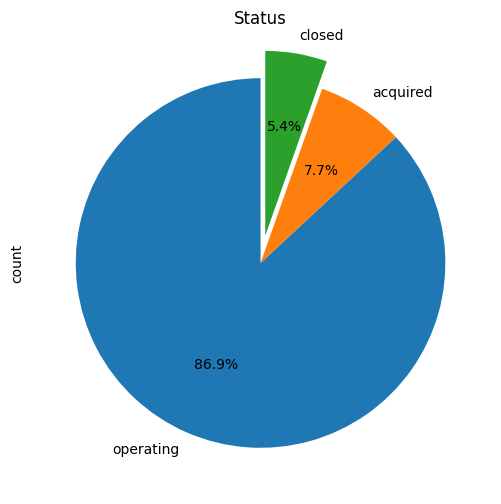

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
df.status.value_counts().plot(kind='pie',shadow=False, explode=(0, 0, 0.15), startangle=90,autopct='%1.1f%%')
plt.title('Status')
plt.show()

In [ ]:
# Count rows where 'post_ipo_debt' is 0.00 or null
count_zero_or_null = len(df[(df['post_ipo_debt'] == 0.00) | (df['post_ipo_debt'].isnull())])
print(f"Number of rows with post_ipo_debt equal to 0.00 or null: {count_zero_or_null}")


Number of rows with post_ipo_debt equal to 0.00 or null: 48063


In [ ]:
# Count rows where 'post_ipo_equity' is 0.00 or null
count_zero_or_null = len(df[(df['post_ipo_equity'] == 0.00) | (df['post_ipo_equity'].isnull())])
print(f"Number of rows with post_ipo_equity equal to 0.00 or null: {count_zero_or_null}")

Number of rows with post_ipo_equity equal to 0.00 or null: 47868


In [ ]:
#Clean IPO Indicators
ipo_cols = ['post_ipo_equity', 'post_ipo_debt']

for col in ipo_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [ ]:
#Derive IPO flag
df['filed_ipo'] = ((df['post_ipo_equity'] > 0) | (df['post_ipo_debt'] > 0)).astype(int)

#Keep only startups with final outcomes: acquired, closed, or filed IPO
df = df[(df['status'].isin(['acquired', 'closed'])) | (df['filed_ipo'] == 1)].copy()

In [ ]:
df.shape

(6586, 29)

In [ ]:
# Count missing values for each column
missing_values = df.isnull().sum()
missing_values

,0
funding_total_usd,0
status,0
country_code,640
funding_rounds,0
founded_year,1422
seed,0
venture,0
equity_crowdfunding,0
undisclosed,0
convertible_note,0


In [ ]:
# 4. Create final success target
df['success'] = np.where(
    (df['status'] == 'acquired') | (df['filed_ipo'] == 1),
    1,  # Success if acquired or IPO
    0   # Failure if closed
)

In [ ]:
# Check new target distribution
print(df['success'].value_counts(normalize=True))

success
1    0.605071
0    0.394929
Name: proportion, dtype: float64


In [ ]:
df[['status', 'success']].head()

,status,success
0,acquired,1
6,closed,0
18,acquired,1
20,acquired,1
27,acquired,1


In [ ]:
# Check shape after cleaning
print("Shape after cleaning:", df.shape)

Shape after cleaning: (6586, 30)


In [ ]:
# Check and display top columns with missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("\nTop columns with missing values:")
print(missing.head(15))


Top columns with missing values:
founded_year           1422
country_code            640
diff_funding_weeks        1
status                    0
funding_rounds            0
funding_total_usd         0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
seed                      0
private_equity            0
dtype: int64


In [ ]:
# Fill missing years with the median year
median_year = int(df['founded_year'].median())
df['founded_year'] = df['founded_year'].fillna(median_year).astype(int)

In [ ]:
df['country_code'].fillna('USA', inplace=True)

<ipython-input-38-d84f6c36a897>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_code'].fillna('USA', inplace=True)


In [ ]:
df['diff_funding_weeks'].fillna(0, inplace=True)

<ipython-input-39-e52b920aa56a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diff_funding_weeks'].fillna(0, inplace=True)


In [ ]:
# Check and display top columns with missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("\nTop columns with missing values:")
print(missing.head(15))


Top columns with missing values:
funding_total_usd      0
status                 0
country_code           0
funding_rounds         0
founded_year           0
seed                   0
venture                0
equity_crowdfunding    0
undisclosed            0
convertible_note       0
debt_financing         0
angel                  0
grant                  0
private_equity         0
post_ipo_equity        0
dtype: int64


In [ ]:
# Final check
print("Data preparation completed.")
print("Shape of cleaned dataset:", df.shape)
print("\nMissing values remaining:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Data preparation completed.
Shape of cleaned dataset: (6586, 30)

Missing values remaining:
funding_total_usd      0
status                 0
country_code           0
funding_rounds         0
founded_year           0
seed                   0
venture                0
equity_crowdfunding    0
undisclosed            0
convertible_note       0
dtype: int64


In [ ]:
df.head()

,funding_total_usd,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,round_c,round_d,round_e,round_f,round_g,round_h,diff_funding_weeks,industry_group,filed_ipo,success
0,1750000.0,acquired,USA,1.0,2012,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Content and Publishing,0,1
6,4912393.0,closed,ARG,1.0,2007,0.0,0.0,0.0,4912393.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Advertising,0,0
18,500000.0,acquired,USA,1.0,2009,500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Other,0,1
20,2535000.0,acquired,USA,2.0,2010,15000.0,2520000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58.714286,Internet Services,0,1
27,1250000.0,acquired,USA,2.0,2011,750000.0,500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,Data and Analytics,0,1


In [ ]:
df[df['filed_ipo']==0]

,funding_total_usd,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,round_c,round_d,round_e,round_f,round_g,round_h,diff_funding_weeks,industry_group,filed_ipo,success
0,1750000.0,acquired,USA,1.0,2012,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Content and Publishing,0,1
6,4912393.0,closed,ARG,1.0,2007,0.0,0.0,0.0,4912393.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Advertising,0,0
18,500000.0,acquired,USA,1.0,2009,500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Other,0,1
20,2535000.0,acquired,USA,2.0,2010,15000.0,2520000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58.714286,Internet Services,0,1
27,1250000.0,acquired,USA,2.0,2011,750000.0,500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,Data and Analytics,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49411,0.0,closed,GBR,1.0,2005,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Mobile,0,0
49413,3384225.0,acquired,FRA,4.0,2005,340525.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,378.142857,Software,0,1
49414,800000.0,closed,USA,1.0,2006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Transportation,0,0
49419,2257464.0,closed,USA,2.0,2006,0.0,757464.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.857143,Biotechnology,0,0


In [ ]:
#Check class balance.
df['success'].value_counts(normalize=True)

,proportion
success,
1,0.605071
0,0.394929


# **3. Exploratory Data Analysis (EDA)**

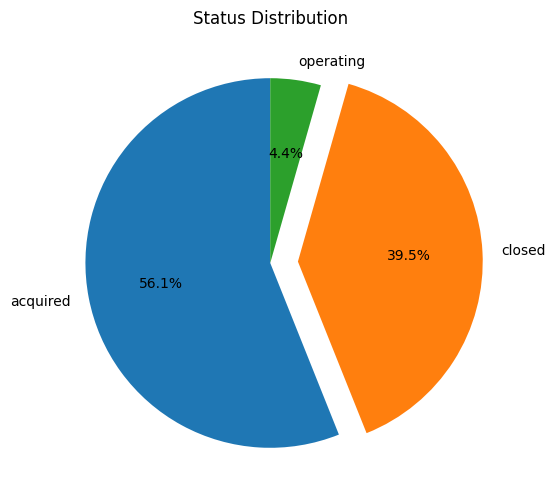

In [ ]:
#After balancing the dataset

# get the counts and labels
status_counts = df['status'].value_counts()

# build an explode list of zeros, then offset the first slice by 0.15
explode = [0]*len(status_counts)
explode[1] = 0.15  # highlight the largest (or first) slice

# plot
plt.figure(figsize=(10,6))
status_counts.plot(
    kind='pie',
    explode=explode,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
)
plt.ylabel('')  # remove the y‑label “status”
plt.title('Status Distribution')
plt.show()

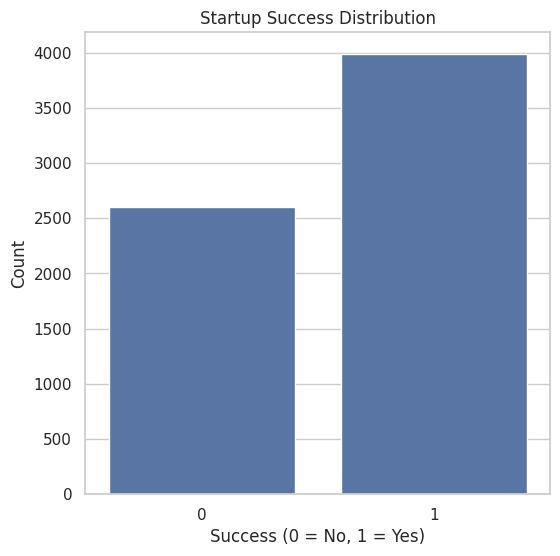

In [ ]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 6)

# 1. Class Imbalance
sns.countplot(data=df, x='success')
plt.title("Startup Success Distribution")
plt.xlabel("Success (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

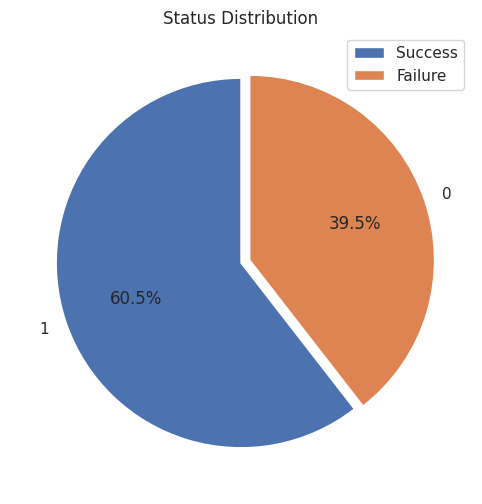

In [ ]:
#After balancing the dataset

# get the counts and labels
status_counts = df['success'].value_counts()

# build an explode list of zeros, then offset the first slice by 0.15
explode = [0]*len(status_counts)
explode[1] = 0.05  # highlight the largest (or first) slice

# plot
plt.figure(figsize=(10,6))
status_counts.plot(
    kind='pie',
    explode=explode,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
)
plt.ylabel('')  # remove the y‑label “status”
plt.legend(labels=['Success', 'Failure'])
plt.title('Status Distribution')
plt.show()

In [ ]:
import plotly.express as px
import os

df_filtered = df[df['founded_year'] >= 1980]

startup_counts = df_filtered.groupby(['founded_year', 'country_code']).size().reset_index(name='num_startups')

startup_counts['cumulative_startups'] = startup_counts.groupby('country_code')['num_startups'].cumsum()

fig = px.choropleth(
    startup_counts,
    locations="country_code",
    color="cumulative_startups",
    hover_name="country_code",
    animation_frame="founded_year",
    color_continuous_scale=px.colors.sequential.Plasma,
    range_color=(0, 3000),
    width=1000,
    height=600
)

for button in fig.layout.updatemenus[0].buttons:
    button['args'][1]['frame']['redraw'] = True

for frame in fig.frames:
    year = frame.name
    frame.layout = dict(title_text=f"Cumulative Number of Startups - {year}")

fig.update_layout(
    title_x=0.5,
    coloraxis_colorbar_y=0.5,
    coloraxis_colorbar=dict(title="Total Startups"),
    geo=dict(showframe=False, showcoastlines=False),
)

fig.write_html("animation.html", auto_play=True)

fig.show()

In [ ]:
df_filtered = df[df['founded_year'] >= 1980]

startup_counts = df_filtered.groupby(['founded_year', 'country_code']).size().reset_index(name='num_startups')

fig = px.choropleth(
    startup_counts,
    locations="country_code",
    color="num_startups",
    hover_name="country_code",
    animation_frame="founded_year",
    color_continuous_scale=px.colors.sequential.Plasma,
    range_color=(0, 500),
    width=1000,
    height=600
)

for button in fig.layout.updatemenus[0].buttons:
    button['args'][1]['frame']['redraw'] = True

for frame in fig.frames:
    year = frame.name
    frame.layout = dict(title_text=f"Number of Startups - {year}")

fig.update_layout(
    title_x=0.5,
    coloraxis_colorbar_y=0.5,
    coloraxis_colorbar=dict(title="Startups Each Year"),
    geo=dict(showframe=False, showcoastlines=False),
)

fig.write_html("animation_each_year.html", auto_play=True)

fig.show()

Animation saved as 'attractive_funding_distribution_animation.gif'


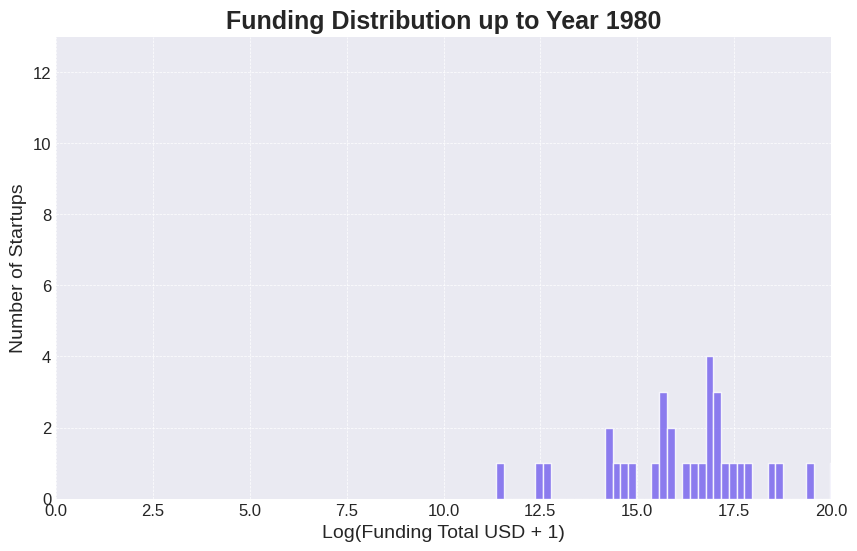

In [ ]:
import matplotlib.animation as animation

years = sorted(df[df['founded_year'] >= 1980]['founded_year'].dropna().unique())

plt.style.use('seaborn-v0_8-darkgrid')  # Updated style name

fig, ax = plt.subplots(figsize=(10, 6))

def update(year):
    ax.clear()

    subset = df[(df['founded_year'] <= year)]

    funding = subset['funding_total_usd']
    funding = funding.dropna()
    funding = funding[funding > 0]

    ax.hist(
        np.log1p(funding),
        bins=50,
        color='mediumslateblue',
        edgecolor='white',
        alpha=0.85
    )

    ax.set_title(f'Funding Distribution up to Year {year}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Log(Funding Total USD + 1)', fontsize=14)
    ax.set_ylabel('Number of Startups', fontsize=14)

    ax.set_xlim(0, 20)
    ax.set_ylim(0, max(10, funding.shape[0] // 10 + 10))

    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.grid(True, linestyle='--', linewidth=0.5)

ani = animation.FuncAnimation(fig, update, frames=years, interval=300, repeat=False)

ani.save('attractive_funding_distribution_animation.gif', writer='pillow', dpi=150)

print("Animation saved as 'attractive_funding_distribution_animation.gif'")

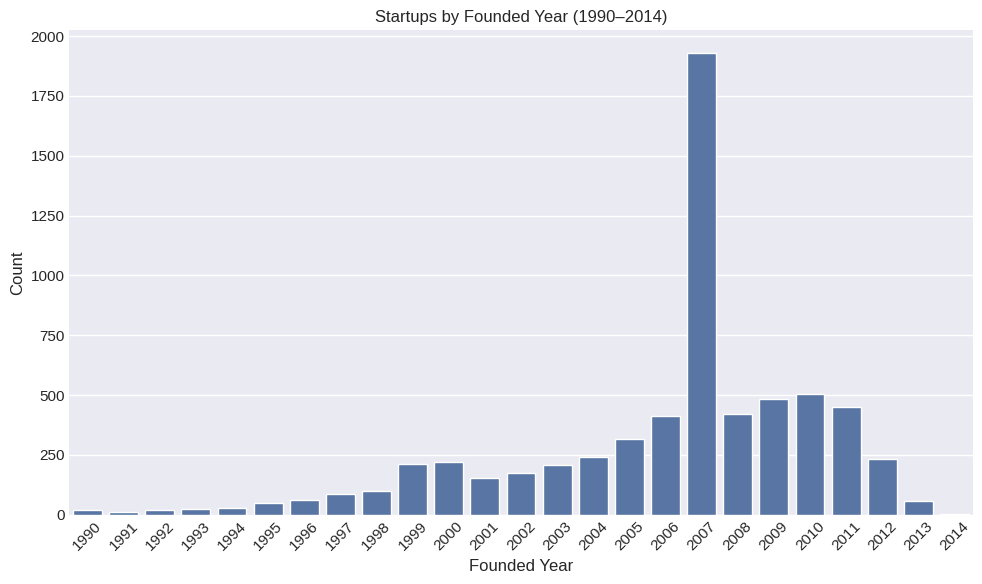

In [ ]:
# 3. Founded Year Trends
year_trimmed = df[(df['founded_year'] >= 1990) & (df['founded_year'] <= 2014)]

# Count by year
plt.figure(figsize=(10, 6))
sns.countplot(data=year_trimmed, x='founded_year', order=sorted(year_trimmed['founded_year'].unique()))
plt.title("Startups by Founded Year (1990–2014)")
plt.xlabel("Founded Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

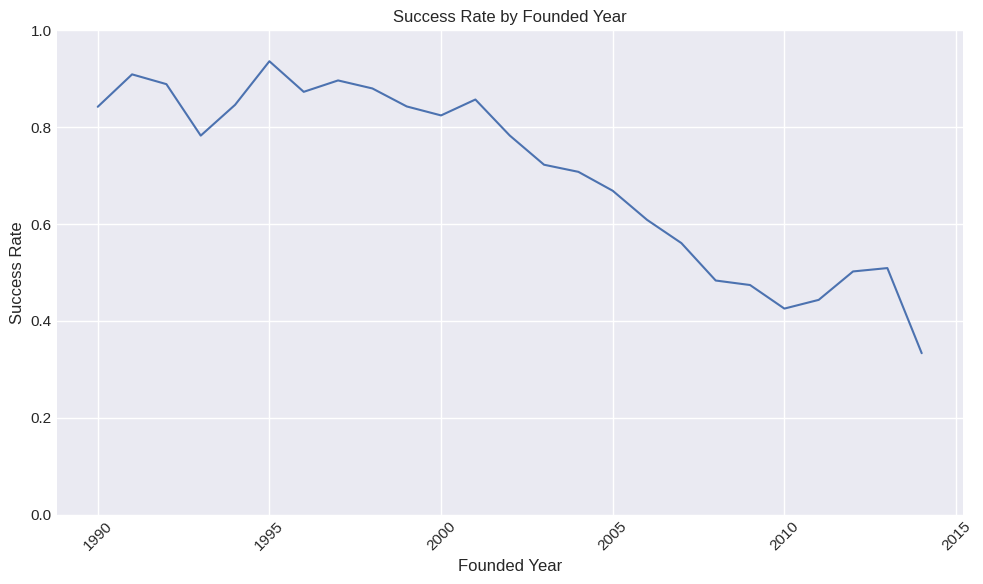

In [ ]:
# Success rate by year
founding_success = year_trimmed.groupby('founded_year')['success'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=founding_success, x='founded_year', y='success')
plt.title("Success Rate by Founded Year")
plt.xlabel("Founded Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

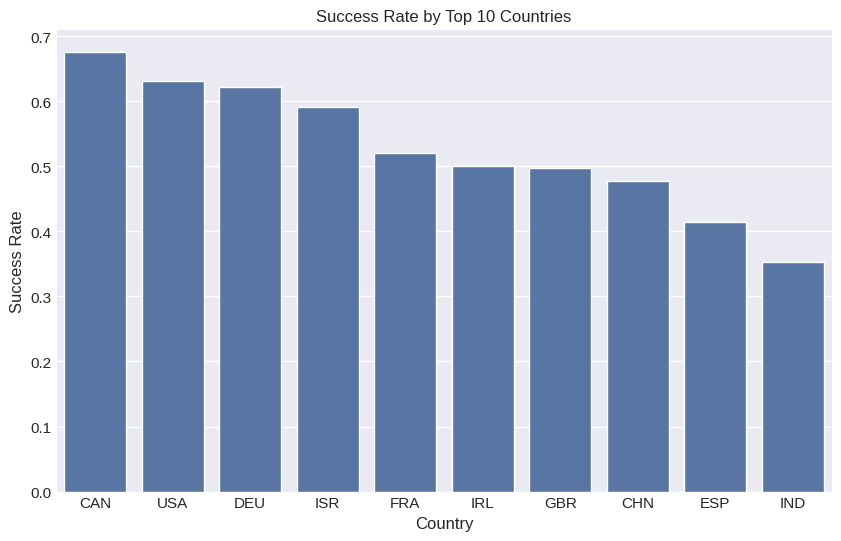

In [ ]:
# 4. Country Success Rate (Top 10)
top_countries = df['country_code'].value_counts().head(10).index
country_success = df[df['country_code'].isin(top_countries)].groupby('country_code')['success'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_success.index, y=country_success.values)
plt.title("Success Rate by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Success Rate")
plt.show()

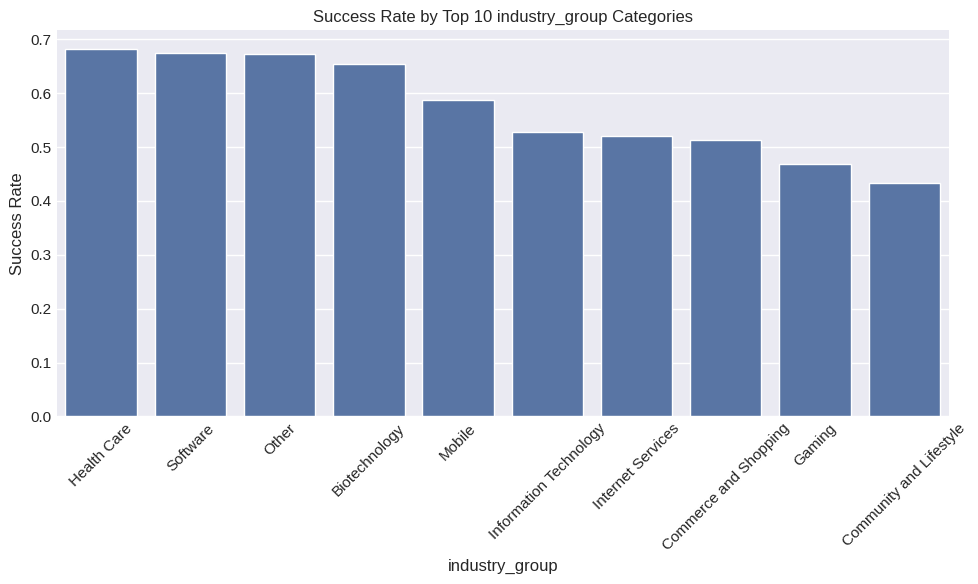

In [ ]:
# 5. industry_group Success Rate (Top 10)
top_industry_groups = df['industry_group'].value_counts().head(10).index
industry_group_success = df[df['industry_group'].isin(top_industry_groups)].groupby('industry_group')['success'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_group_success.index, y=industry_group_success.values)
plt.title("Success Rate by Top 10 industry_group Categories")
plt.xticks(rotation=45)
plt.xlabel("industry_group")
plt.ylabel("Success Rate")
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,round_b,round_c,round_d,round_e,round_f,round_g,round_h,diff_funding_weeks,filed_ipo,success
count,6.586000e+03,6586.000000,6586.000000,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,...,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6586.0,6586.000000,6586.000000,6586.000000
mean,2.141470e+07,1.817643,2005.392803,1.579431e+05,1.043524e+07,1.348779e+03,1.237347e+05,1.504470e+04,1.441008e+06,6.688465e+04,...,2.500250e+06,1.881022e+06,1.076649e+06,4.210093e+05,1.751351e+05,2.209232e+04,0.0,55.252462,0.045703,0.605071
std,1.394448e+08,1.347231,6.343194,7.449901e+05,2.510614e+07,7.482819e+04,2.487417e+06,6.010044e+05,2.318425e+07,5.584825e+05,...,9.036557e+06,7.740479e+06,7.975522e+06,4.703606e+06,4.360512e+06,1.017839e+06,0.0,99.650091,0.208856,0.488872
min,0.000000e+00,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000
25%,2.365150e+05,1.000000,2004.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000
50%,3.000000e+06,1.000000,2007.000000,0.000000e+00,1.498475e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,1.000000
75%,1.425375e+07,2.000000,2009.000000,0.000000e+00,1.087595e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,82.142857,0.000000,1.000000
max,5.800000e+09,15.000000,2014.000000,2.500000e+07,7.750000e+08,5.500000e+06,1.250000e+08,4.600000e+07,1.200000e+09,3.000000e+07,...,3.500000e+08,2.000000e+08,2.500000e+08,2.200000e+08,2.860000e+08,6.300000e+07,0.0,2469.571429,1.000000,1.000000


# **4. Feature Engineering**

In [ ]:
# Derived Feature: Years Since Founding (as of last year in dataset = 2014)
df['years_since_founding'] = 2014 - df['founded_year']

In [ ]:
#Binary Feature: Has raised funding
df['has_raised_funding'] = (df['funding_total_usd'] > 0).astype(int)

In [ ]:
#Create Funding Bin
funding_bins = [-1, 1e6, 10e6, 50e6, 100e6, np.inf]
funding_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['funding_bin'] = pd.cut(
    df['funding_total_usd'],
    bins=funding_bins,
    labels=funding_labels
)

In [ ]:
#Create Binary Features for Early Funding
early_fundings = ['seed', 'venture', 'angel']

for col in early_fundings:
    if col in df.columns:
        df[f'has_{col}_funding'] = (df[col] > 0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6586 entries, 0 to 49430
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   funding_total_usd     6586 non-null   float64 
 1   status                6586 non-null   object  
 2   country_code          6586 non-null   object  
 3   funding_rounds        6586 non-null   float64 
 4   founded_year          6586 non-null   int64   
 5   seed                  6586 non-null   float64 
 6   venture               6586 non-null   float64 
 7   equity_crowdfunding   6586 non-null   float64 
 8   undisclosed           6586 non-null   float64 
 9   convertible_note      6586 non-null   float64 
 10  debt_financing        6586 non-null   float64 
 11  angel                 6586 non-null   float64 
 12  grant                 6586 non-null   float64 
 13  private_equity        6586 non-null   float64 
 14  post_ipo_equity       6586 non-null   float64 
 15  post_ipo

In [ ]:
# Identify columns with categorical data (i.e., object dtype or category dtype)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['status', 'country_code', 'industry_group', 'funding_bin'], dtype='object')


In [ ]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

label_cols = ['country_code', 'industry_group', 'funding_bin']

le = LabelEncoder()

for col in label_cols:
    if col in df.columns:
       df[col] = le.fit_transform(df[col].astype(str))

print("\nEncoded Sample Columns:")
display(df[label_cols].head())


Encoded Sample Columns:


,country_code,industry_group,funding_bin
0,64,10,1
6,1,1,1
18,64,30,4
20,64,23,1
27,64,11,1


In [ ]:
#Final Features for Modeling
feature_cols = [
    'years_since_founding', 'has_raised_funding',
    'funding_rounds', 'country_code', 'industry_group',
    'market', 'funding_bin', 'diff_funding_weeks'
] + [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
    'round_a', 'round_b', 'round_c', 'round_d', 'round_e',
    'round_f', 'round_g',
    'has_seed_funding', 'has_venture_funding', 'has_angel_funding',
]
# Features to remove
exclude = ['funding_total_usd_log', 'state_code', 'region', 'city', 'market', 'category_list']

# Final list with those excluded
final_features = [f for f in feature_cols if f not in exclude]
print(final_features)

['years_since_founding', 'has_raised_funding', 'funding_rounds', 'country_code', 'industry_group', 'funding_bin', 'diff_funding_weeks', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_a', 'round_b', 'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'has_seed_funding', 'has_venture_funding', 'has_angel_funding']


In [ ]:
# 4. Create Final Modeling Dataset
df_model = df[final_features + ['success']].copy()

print("Feature Engineering and Encoding Complete.")
print("Final dataset shape:", df_model.shape)
display(df_model.head())

Feature Engineering and Encoding Complete.
Final dataset shape: (6586, 31)


,years_since_founding,has_raised_funding,funding_rounds,country_code,industry_group,funding_bin,diff_funding_weeks,seed,venture,equity_crowdfunding,...,round_b,round_c,round_d,round_e,round_f,round_g,has_seed_funding,has_venture_funding,has_angel_funding,success
0,2,1,1.0,64,10,1,0.000000,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
6,7,1,1.0,1,1,1,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
18,5,1,1.0,64,30,4,0.000000,500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
20,4,1,2.0,64,23,1,58.714286,15000.0,2520000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
27,3,1,2.0,64,11,1,4.000000,750000.0,500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1


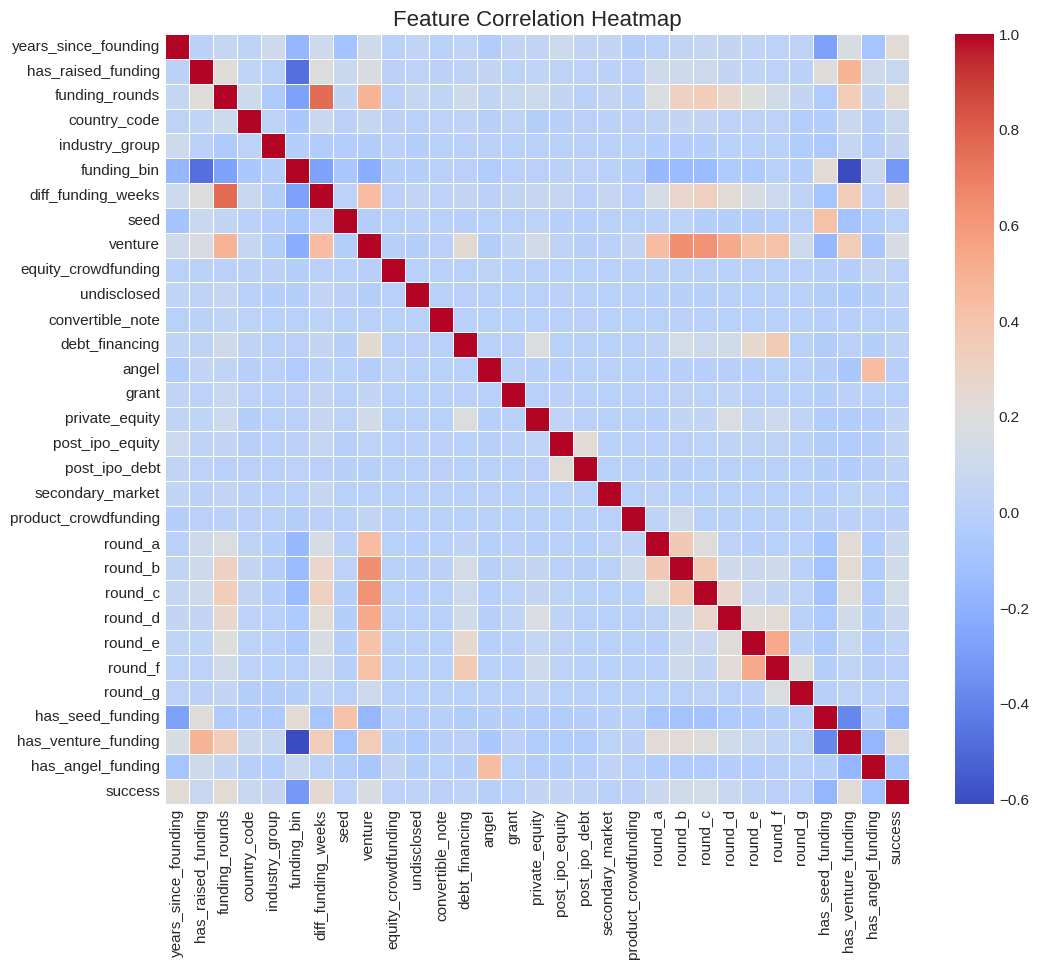

In [ ]:
#Plot Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df_model.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# **5. Baseline Model Building**

## 1. Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       521
           1       0.77      0.69      0.73       797

    accuracy                           0.69      1318
   macro avg       0.68      0.69      0.68      1318
weighted avg       0.70      0.69      0.69      1318



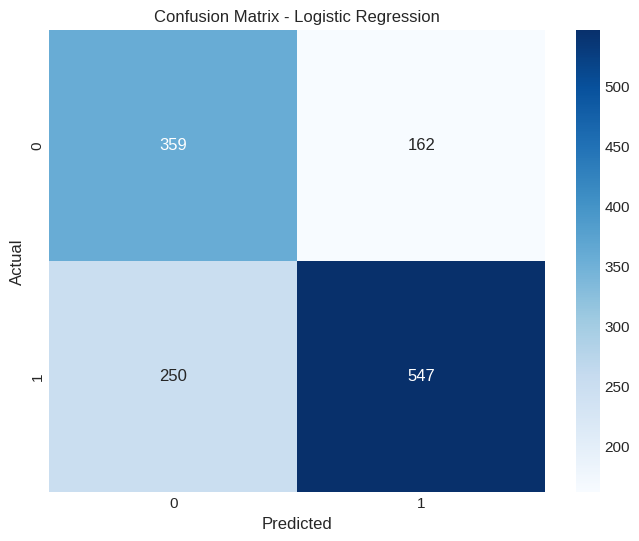

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

X = df_model.drop(columns='success')
y = df_model['success']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=5000, class_weight='balanced', solver='lbfgs', random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

y_pred_lr = logreg.predict(X_test_scaled)
y_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# ROC-AUC
auc = roc_auc_score(y_test, y_proba)
print(f" ROC AUC Score: {auc:.4f}")

 ROC AUC Score: 0.7596


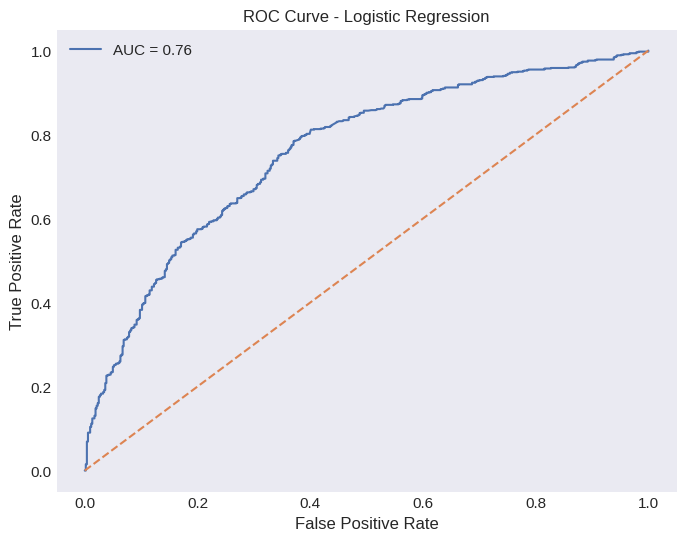

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

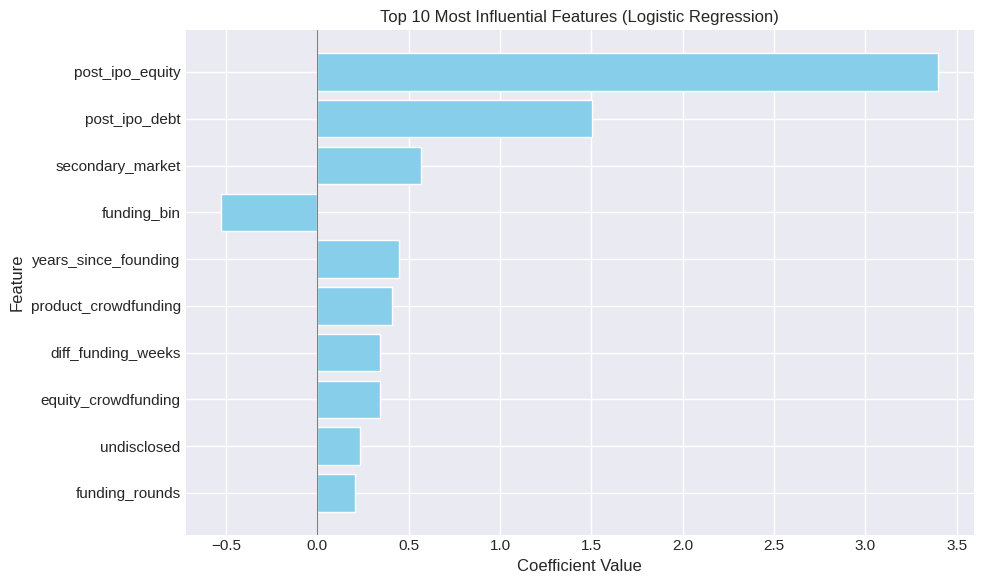

In [ ]:
feature_names = X.columns
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

top_10 = feature_importance.nlargest(10, 'Abs_Coefficient')

plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Coefficient'], color='skyblue')
plt.axvline(0, color='gray', linewidth=0.8)
plt.title("Top 10 Most Influential Features (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 2. Decision Trees Classifier

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       521
           1       0.75      0.64      0.69       797

    accuracy                           0.65      1318
   macro avg       0.65      0.66      0.65      1318
weighted avg       0.67      0.65      0.66      1318



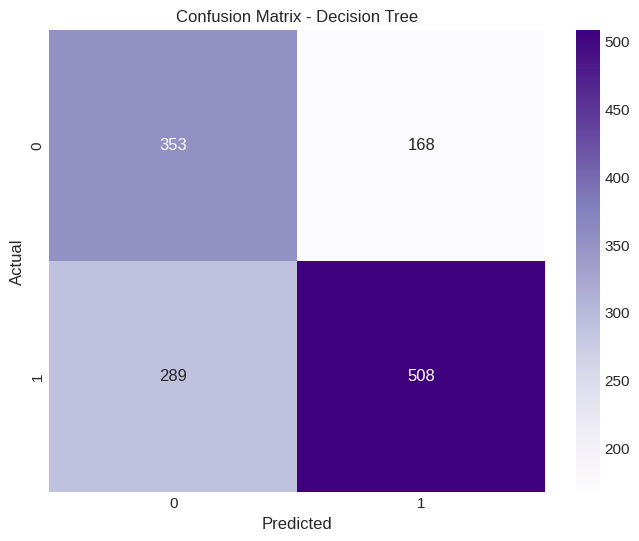

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Initialize the Decision Tree
dtree = DecisionTreeClassifier(
    criterion='gini',     # Or try 'entropy' for information gain
    max_depth=None,       # No depth limit (can prune later if needed)
    min_samples_split=10, # Minimum samples to split a node (prevent overfitting)
    min_samples_leaf=5,   # Minimum samples at a leaf node
    class_weight='balanced',  # Handle mild imbalance
    random_state=42
)

# 2. Train on unscaled data (trees don't need scaling!)
dtree.fit(X_train, y_train)

# 3. Predictions
y_pred_dt = dtree.predict(X_test)
y_proba_dt = dtree.predict_proba(X_test)[:, 1]

# 4. Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='g', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# ROC-AUC
auc_dt= roc_auc_score(y_test, y_proba_dt)
print(f" ROC AUC Score: {auc_dt:.4f}")

 ROC AUC Score: 0.7207


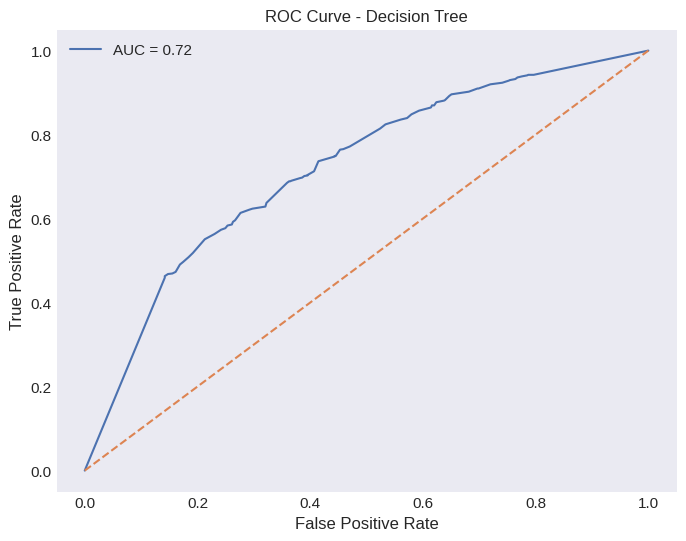

In [ ]:
# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {auc_dt:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid()
plt.show()

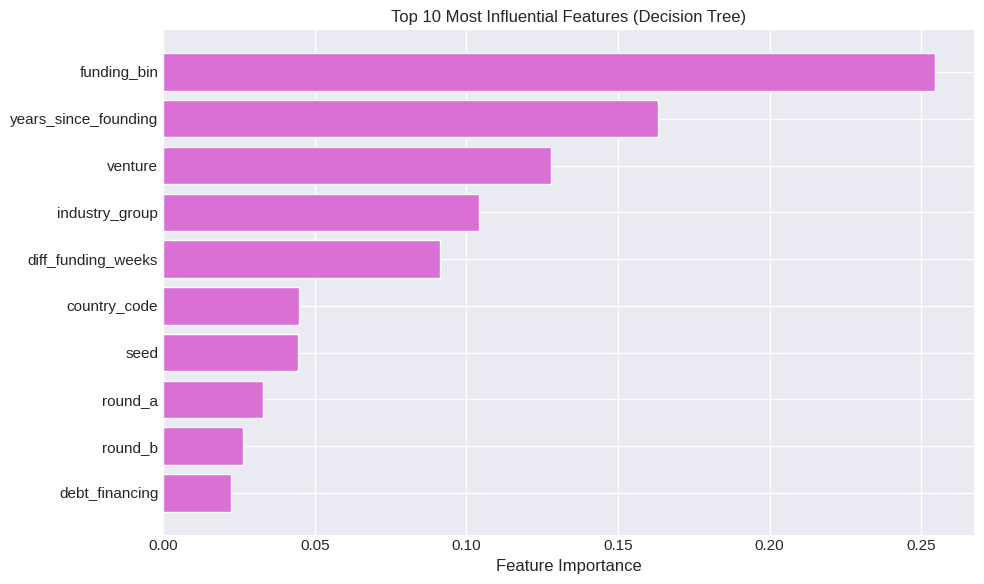

In [ ]:
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtree.feature_importances_
})

feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

top_10_dt = feature_importance_dt.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_dt['Feature'], top_10_dt['Importance'], color='orchid')
plt.title("Top 10 Most Influential Features (Decision Tree)")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. Random Forest Classifier

Classification Report - Normal Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       521
           1       0.76      0.85      0.80       797

    accuracy                           0.75      1318
   macro avg       0.74      0.72      0.72      1318
weighted avg       0.74      0.75      0.74      1318



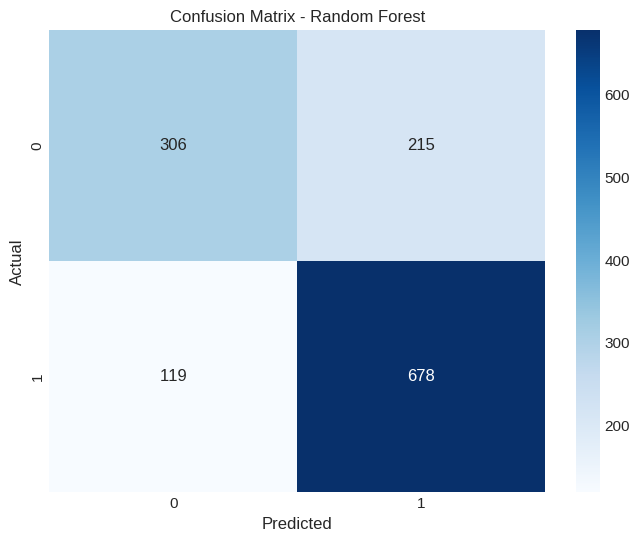

In [ ]:
# Import RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train RandomForest on the updated balanced data
rf_model = RandomForestClassifier(
    n_estimators=200,       # Number of trees
    max_depth=None,         # Full tree growth (you can tune this if needed)
    min_samples_split=10,   # Prevents overfitting a little
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report - Normal Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# ROC AUC Score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f" ROC AUC Score (Random Forest): {auc_rf:.4f}")

 ROC AUC Score (Random Forest): 0.8011


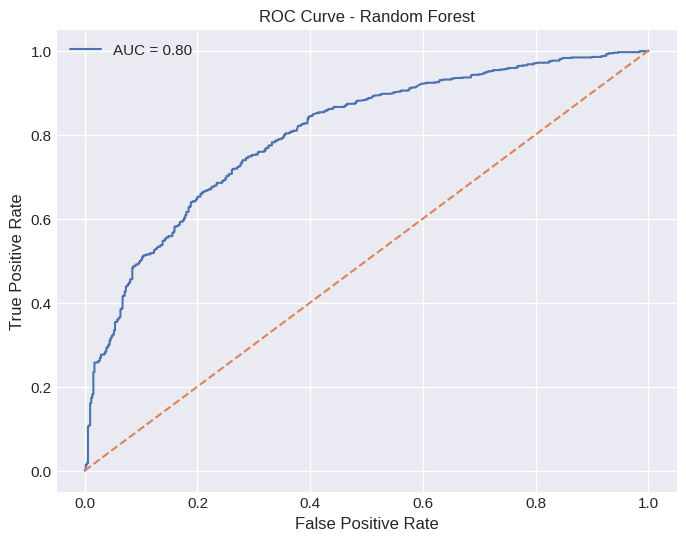

In [ ]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

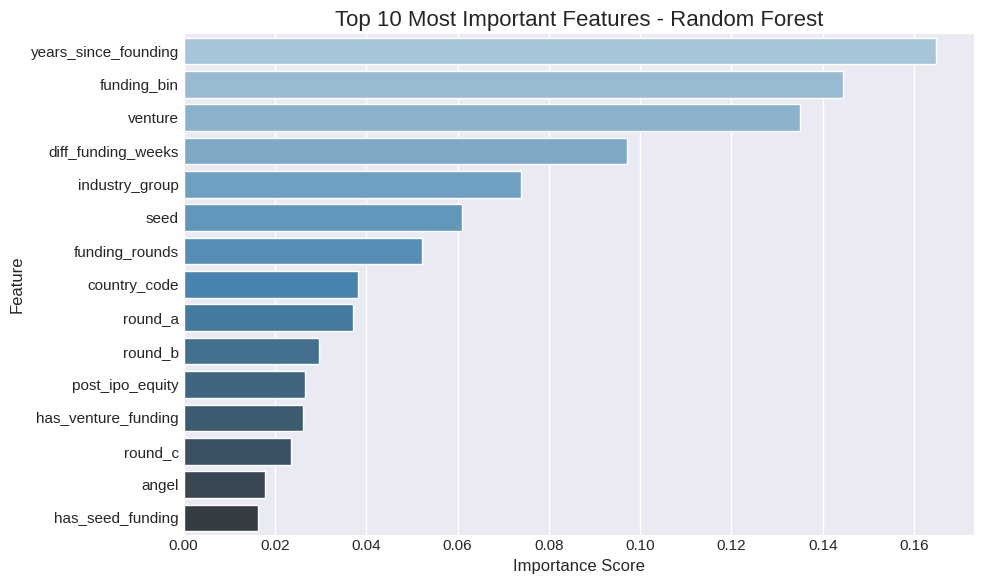

In [ ]:
#Top Features

# 1. Extract Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# 2. Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# 3. Plot Top 10 Important Features
plt.figure(figsize=(10, 6))
sns.barplot( data=feature_importances.head(15), x="Importance", y="Feature", hue="Feature", dodge=False, palette="Blues_d", legend=False)
plt.title("Top 10 Most Important Features - Random Forest", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 4. XGBoost

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       521
           1       0.79      0.73      0.76       797

    accuracy                           0.72      1318
   macro avg       0.71      0.71      0.71      1318
weighted avg       0.72      0.72      0.72      1318



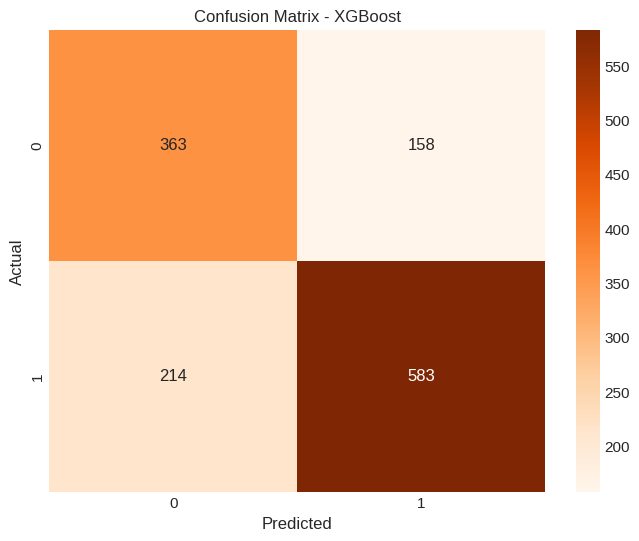

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare data
X = df_model.drop(columns='success')
y = df_model['success']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Calculate scale_pos_weight = (negatives / positives) to help with imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize and train XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# ROC-AUC
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"ROC AUC Score: {auc_xgb:.4f}")

ROC AUC Score: 0.8014


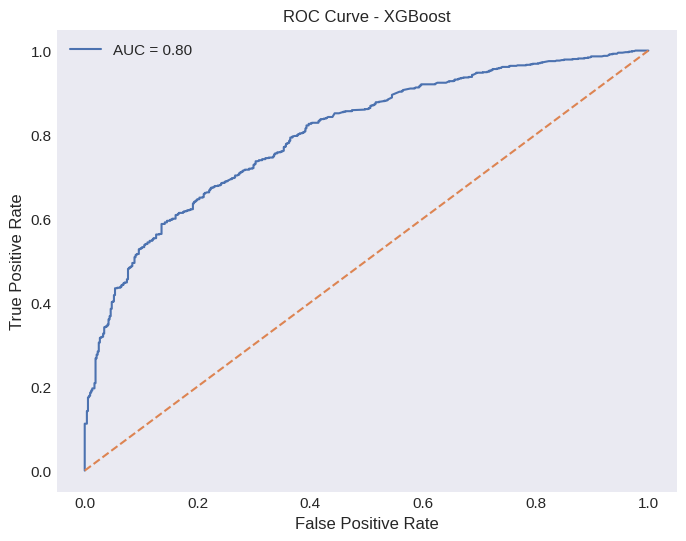

In [ ]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()

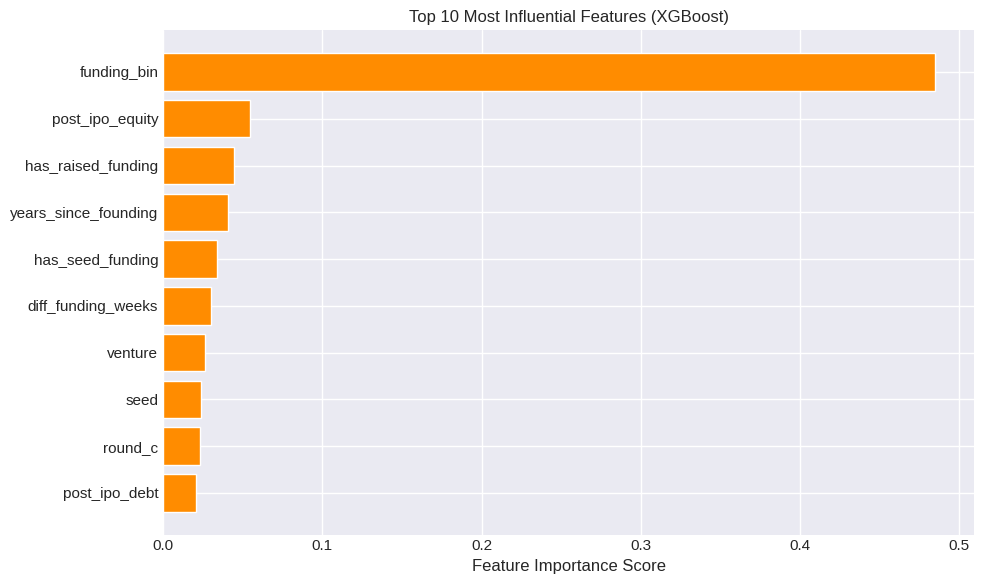

In [ ]:
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

top_10_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_xgb['Feature'], top_10_xgb['Importance'], color='darkorange')
plt.title("Top 10 Most Influential Features (XGBoost)")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

## 5. LightGBM

[LightGBM] [Info] Number of positive: 3188, number of negative: 2080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1942
[LightGBM] [Info] Number of data points in the train set: 5268, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605163 -> initscore=0.427026
[LightGBM] [Info] Start training from score 0.427026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

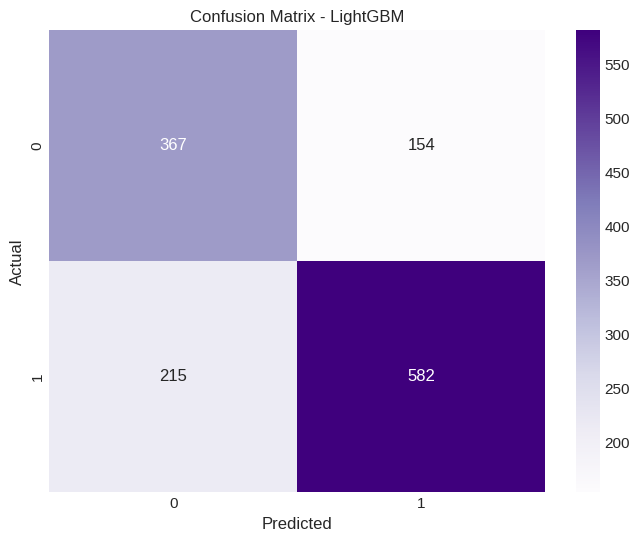

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare data
X = df_model.drop(columns='success')
y = df_model['success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle imbalance by setting scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# LightGBM classifier
lgbm = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    is_unbalance=True,  # or use scale_pos_weight=scale_pos_weight
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train model
lgbm.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgbm.predict(X_test)
y_proba_lgb = lgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report - LightGBM:")
print(classification_report(y_test, y_pred_lgb))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()

In [ ]:
# ROC-AUC
auc_lgb = roc_auc_score(y_test, y_proba_lgb)
print(f"ROC AUC Score: {auc_lgb:.4f}")

ROC AUC Score: 0.8001


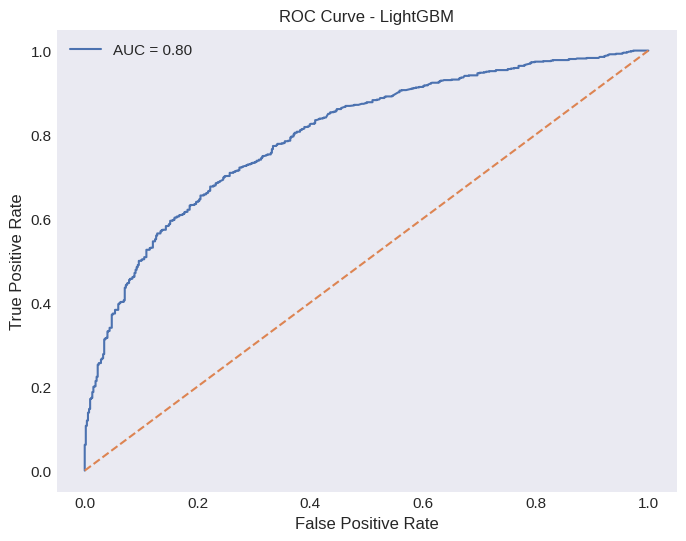

In [ ]:
# ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f"AUC = {auc_lgb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.grid()
plt.show()

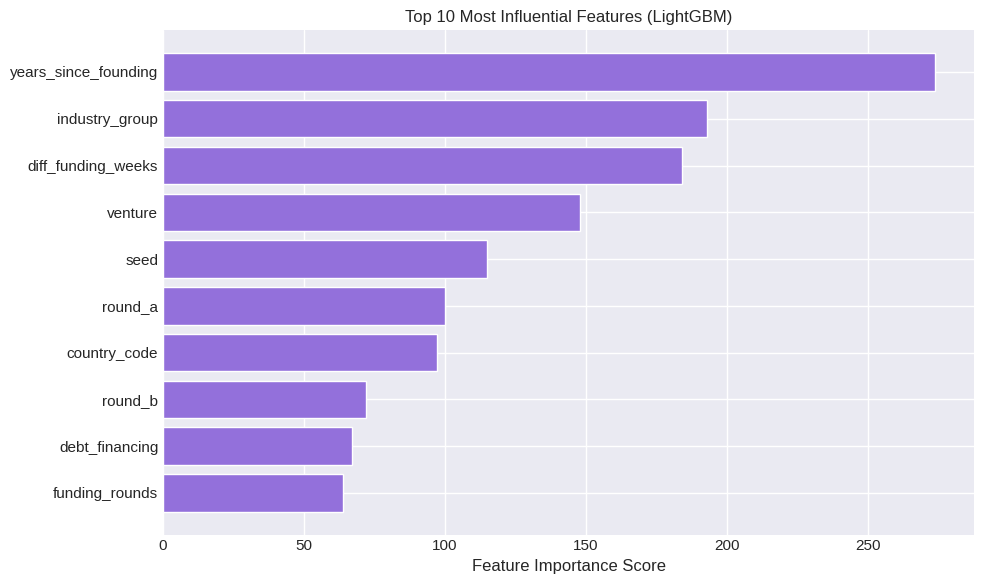

In [ ]:
feature_importance_lgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm.feature_importances_
})

top_10_lgb = feature_importance_lgb.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_lgb['Feature'], top_10_lgb['Importance'], color='mediumpurple')
plt.title("Top 10 Most Influential Features (LightGBM)")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. CatBoost

In [ ]:
!pip install catboost

Classification Report - CatBoost:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       521
           1       0.79      0.73      0.76       797

    accuracy                           0.72      1318
   macro avg       0.71      0.72      0.71      1318
weighted avg       0.73      0.72      0.72      1318



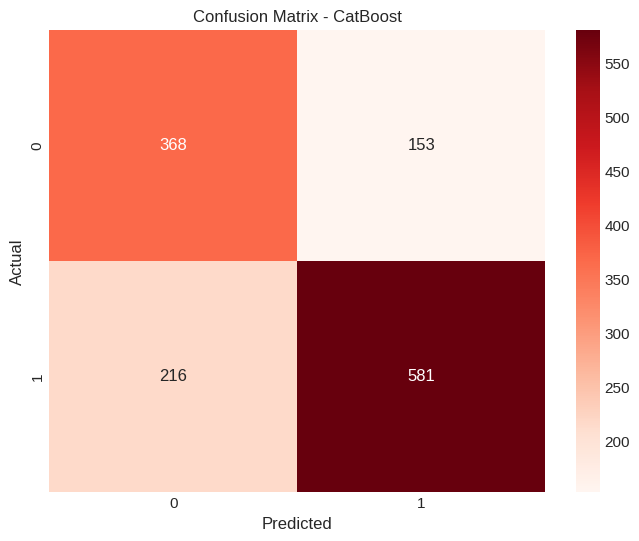

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare data
X = df_model.drop(columns='success')
y = df_model['success']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Calculate class weights to address imbalance
class_weights = [1.0, (y_train == 0).sum() / (y_train == 1).sum()]

# Initialize CatBoost model
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    class_weights=class_weights,
    verbose=0,
    random_seed=42
)

# Fit model
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report - CatBoost:")
print(classification_report(y_test, y_pred_cat))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()

In [ ]:
# ROC-AUC
auc_cat = roc_auc_score(y_test, y_proba_cat)
print(f"ROC AUC Score: {auc_cat:.4f}")

ROC AUC Score: 0.8019


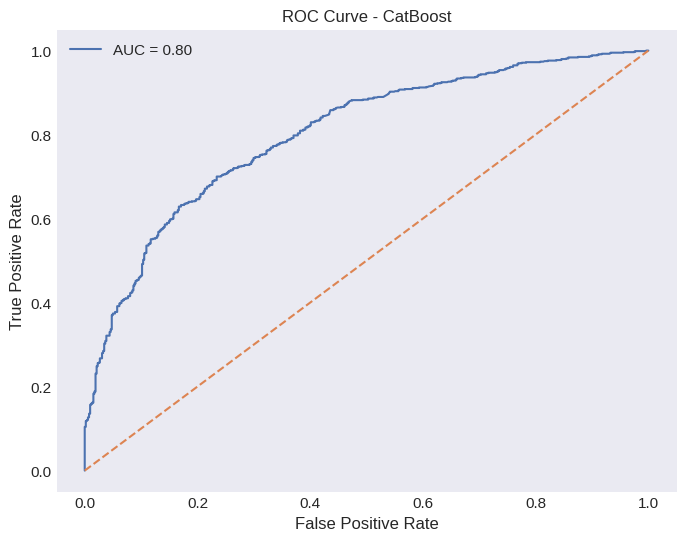

In [ ]:
# ROC Curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, label=f"AUC = {auc_cat:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.grid()
plt.show()

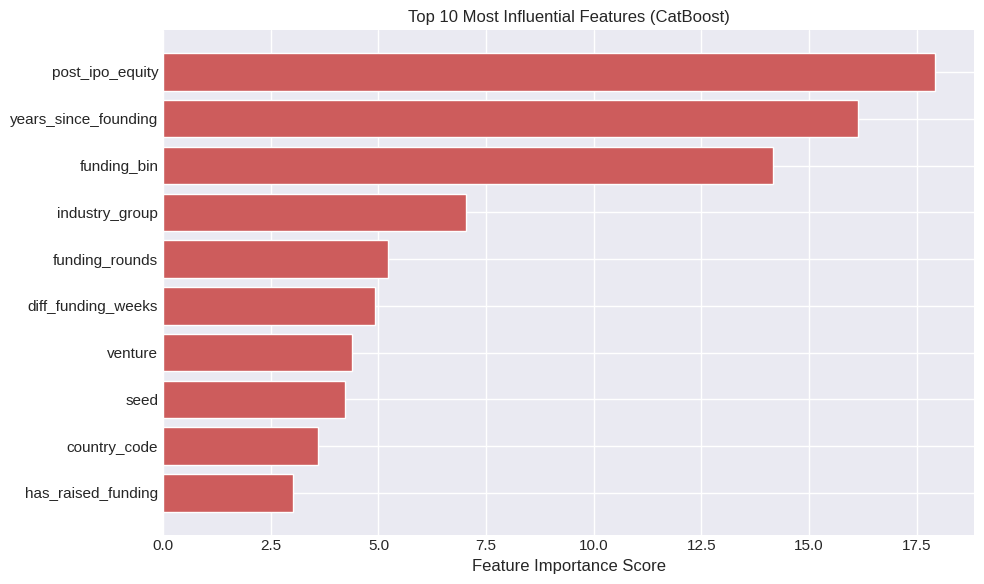

In [ ]:
feature_importance_cat = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_model.get_feature_importance()
})

top_10_cat = feature_importance_cat.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_cat['Feature'], top_10_cat['Importance'], color='indianred')
plt.title("Top 10 Most Influential Features (CatBoost)")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **6. Base Model Comparison using ROC curve**

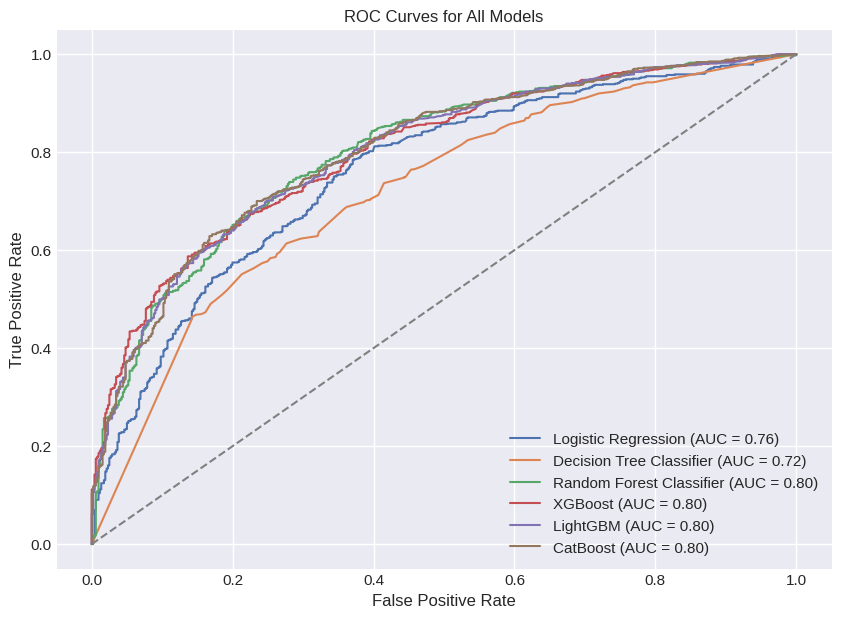

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Actual target
y_true = y_test

# Organize model predictions
models = {
    "Logistic Regression": (y_pred_lr, y_proba_lr),
    "Decision Tree Classifier": (y_pred_dt, y_proba_dt),
    "Random Forest Classifier": (y_pred_rf, y_proba_rf),
    "XGBoost": (y_pred_xgb, y_proba_xgb),
    "LightGBM": (y_pred_lgb, y_proba_lgb),
    "CatBoost": (y_pred_cat, y_proba_cat),
}

#Collect metrics
metrics_list = []
for name, (y_pred, y_proba) in models.items():
    metrics_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    })

metrics_df = pd.DataFrame(metrics_list)

#Plot Combined ROC Curve
plt.figure(figsize=(10, 7))
for name, (_, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# **7. Model Tuning: Random Forest Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Randomized Search
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit Randomized Search
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters Found:")
print(rf_random.best_params_)

# Best Random Forest model
best_rf_model = rf_random.best_estimator_

# Evaluate on Test Set
y_pred_best_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters Found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       521
           1       0.75      0.83      0.79       797

    accuracy                           0.73      1318
   macro avg       0.72      0.71      0.71      1318
weighted avg       0.73      0.73      0.73      1318



In [ ]:
# Predict probabilities
y_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)
print(f"Fine-Tuned Random Forest ROC AUC Score: {auc_best_rf:.4f}")

Fine-Tuned Random Forest ROC AUC Score: 0.7889


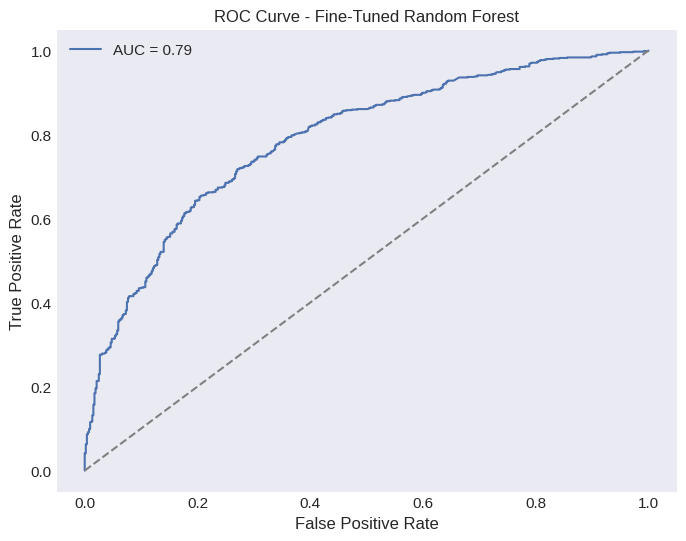

In [ ]:
# Plot ROC Curve
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_proba_best_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_rf, tpr_best_rf, label=f"AUC = {auc_best_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fine-Tuned Random Forest")
plt.legend()
plt.grid()
plt.show()

# **8. Feature Importance Analysis**

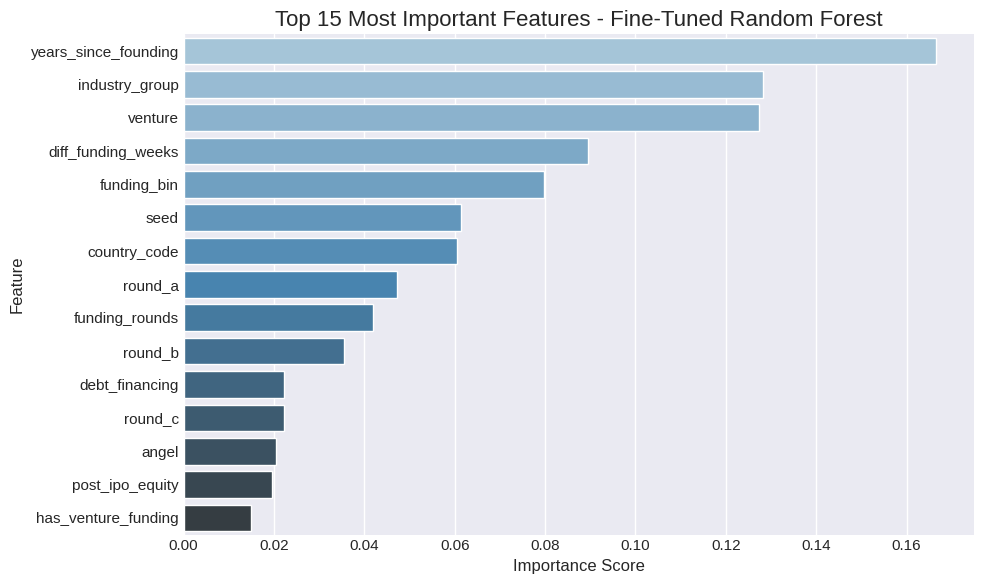

In [ ]:
#Top Features

# 1. Extract Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
})

# 2. Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# 3. Plot Top 15 Important Features
plt.figure(figsize=(10, 6))
sns.barplot( data=feature_importances.head(15), x="Importance", y="Feature", hue="Feature", dodge=False, palette="Blues_d", legend=False)
plt.title("Top 15 Most Important Features - Fine-Tuned Random Forest", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **9. Stack Ensemble Model**

Stacking Ensemble (All Base Models) - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       521
           1       0.79      0.74      0.77       797

    accuracy                           0.73      1318
   macro avg       0.72      0.72      0.72      1318
weighted avg       0.73      0.73      0.73      1318

Accuracy: 0.7261
ROC AUC Score: 0.8021


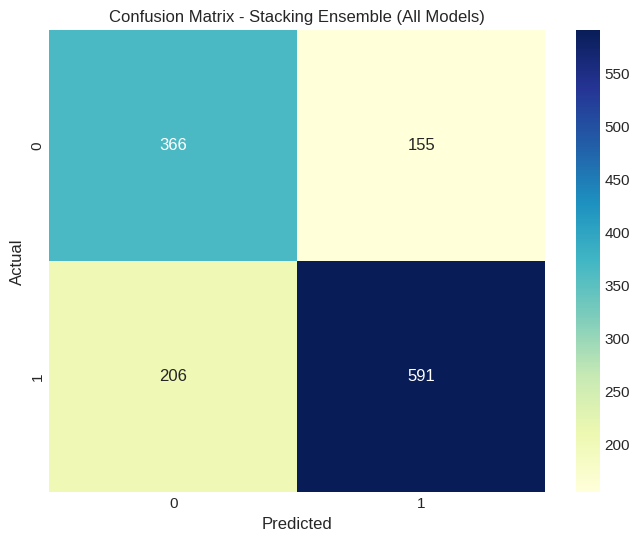

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

# Define base models with tuned or consistent parameters
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=20, min_samples_split=2, min_samples_leaf=1, class_weight='balanced', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', class_weight='balanced', random_state=42)),
    ('lgbm', LGBMClassifier(objective='binary', max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', learning_rate=0.1, max_depth=5, n_estimators=100, use_label_encoder=False, random_state=42)),
    ('cat', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, class_weights=[1.0, (y_train == 0).sum() / (y_train == 1).sum()], random_seed=42))
]

# Define meta-learner
meta_model = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

# Build Stacking Classifier
stacking_all_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=False
)

# Train stacking model
stacking_all_model.fit(X_train, y_train)

# Predictions
y_pred_stack_all = stacking_all_model.predict(X_test)
y_proba_stack_all = stacking_all_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Stacking Ensemble (All Base Models) - Classification Report:")
print(classification_report(y_test, y_pred_stack_all))

accuracy_stack_all = accuracy_score(y_test, y_pred_stack_all)
auc_stack_all = roc_auc_score(y_test, y_proba_stack_all)

print(f"Accuracy: {accuracy_stack_all:.4f}")
print(f"ROC AUC Score: {auc_stack_all:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_stack_all), annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stacking Ensemble (All Models)")
plt.show()

In [ ]:
# ROC-AUC
auc_stack_all = roc_auc_score(y_test, y_proba_stack_all)
print(f"ROC AUC Score: {auc_stack_all:.4f}")

ROC AUC Score: 0.8021


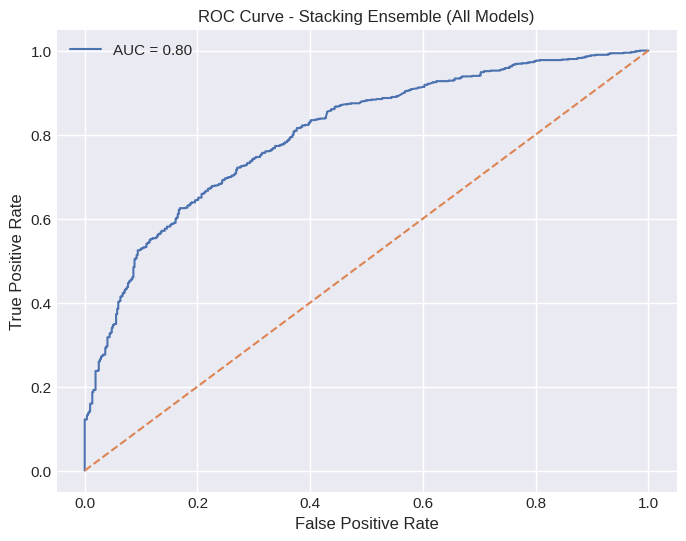

In [ ]:
# ROC Curve
fpr_stack_all, tpr_stack_all, _ = roc_curve(y_test, y_proba_stack_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack_all, tpr_stack_all, label=f"AUC = {auc_stack_all:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stacking Ensemble (All Models)")
plt.legend()
plt.grid(True)
plt.show()

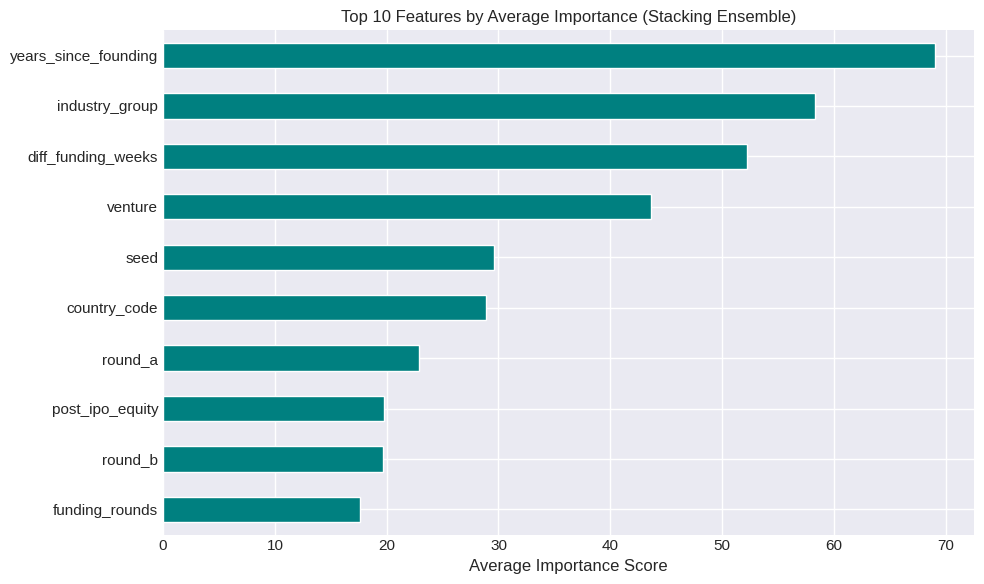

In [ ]:
feature_df = pd.DataFrame(index=X_train.columns)

model_names = ['rf', 'xgb', 'lgbm', 'cat']
for name, model in stacking_all_model.named_estimators_.items():
    if name in model_names:
        if hasattr(model, 'feature_importances_'):
            feature_df[name] = model.feature_importances_

# Average importance across models
feature_df['Average_Importance'] = feature_df.mean(axis=1)

# Get top 10 features
top_10_features = feature_df.sort_values(by='Average_Importance', ascending=False).head(10)

top_10_features['Average_Importance'].plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 10 Features by Average Importance (Stacking Ensemble)")
plt.xlabel("Average Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **10. Final Model Comparison Table**

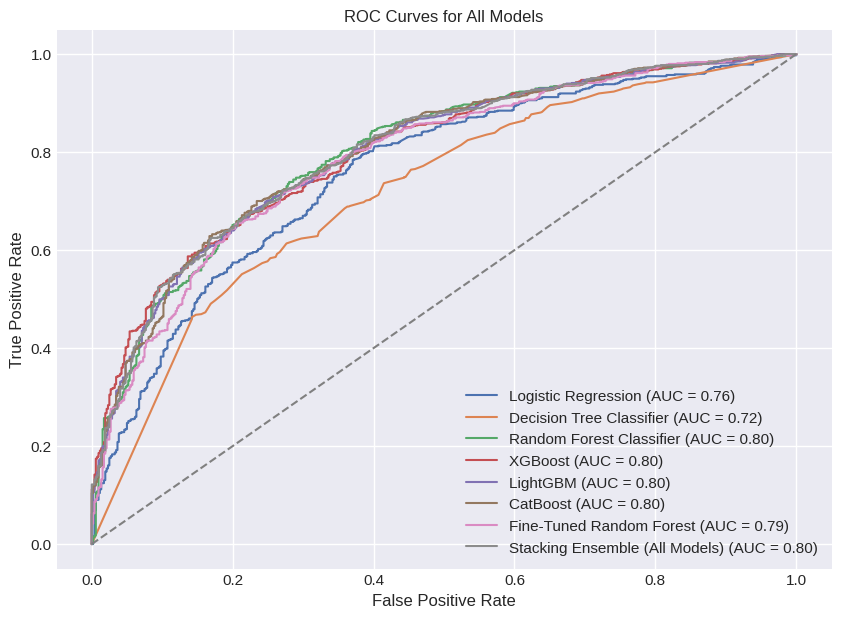

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Actual target
y_true = y_test

# Organize model predictions
models = {
    "Logistic Regression": (y_pred_lr, y_proba_lr),
    "Decision Tree Classifier": (y_pred_dt, y_proba_dt),
    "Random Forest Classifier": (y_pred_rf, y_proba_rf),
    "XGBoost": (y_pred_xgb, y_proba_xgb),
    "LightGBM": (y_pred_lgb, y_proba_lgb),
    "CatBoost": (y_pred_cat, y_proba_cat),
    "Fine-Tuned Random Forest": (y_pred_best_rf, y_proba_best_rf),
    "Stacking Ensemble (All Models)": (y_pred_stack_all, y_proba_stack_all),
}

#Collect metrics
metrics_list = []
for name, (y_pred, y_proba) in models.items():
    metrics_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    })

metrics_df = pd.DataFrame(metrics_list)

#Plot Combined ROC Curve
plt.figure(figsize=(10, 7))
for name, (_, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Final predictions for each model
# (Make sure these are already defined in your notebook)
models_final = {
    "Logistic Regression": (y_pred_lr, y_proba_lr),
    "Decision Tree Classifier": (y_pred_dt, y_proba_dt),
    "Random Forest": (y_pred_rf, y_proba_rf),
    "XGBoost": (y_pred_xgb, y_proba_xgb),
    "LightGBM": (y_pred_lgb, y_proba_lgb),
    "CatBoost": (y_pred_cat, y_proba_cat),
    "Fine-Tuned Random Forest": (y_pred_best_rf, y_proba_best_rf),
    "Stacking Ensemble (All Models)": (y_pred_stack_all, y_proba_stack_all),
}

# Collect evaluation metrics
summary_metrics = []

for model_name, (y_pred_i, y_proba_i) in models_final.items():
    summary_metrics.append({
        "Model": model_name,
        "Accuracy": round(accuracy_score(y_test, y_pred_i), 3),
        "Precision": round(precision_score(y_test, y_pred_i), 3),
        "Recall": round(recall_score(y_test, y_pred_i), 3),
        "F1-Score": round(f1_score(y_test, y_pred_i), 3),
        "AUC": round(roc_auc_score(y_test, y_proba_i), 3)
    })

# Convert to DataFrame
final_summary_df = pd.DataFrame(summary_metrics).sort_values(by="AUC", ascending=False)

# Display
print("Final Model Comparison Summary:")
display(final_summary_df)

Final Model Comparison Summary:


,Model,Accuracy,Precision,Recall,F1-Score,AUC
7,Stacking Ensemble (All Models),0.726,0.792,0.742,0.766,0.802
5,CatBoost,0.720,0.792,0.729,0.759,0.802
3,XGBoost,0.718,0.787,0.731,0.758,0.801
2,Random Forest,0.747,0.759,0.851,0.802,0.801
4,LightGBM,0.720,0.791,0.730,0.759,0.800
6,Fine-Tuned Random Forest,0.732,0.753,0.829,0.789,0.789
0,Logistic Regression,0.687,0.772,0.686,0.726,0.760
1,Decision Tree Classifier,0.653,0.751,0.637,0.690,0.721


# **11.Profit Curve Analysis**

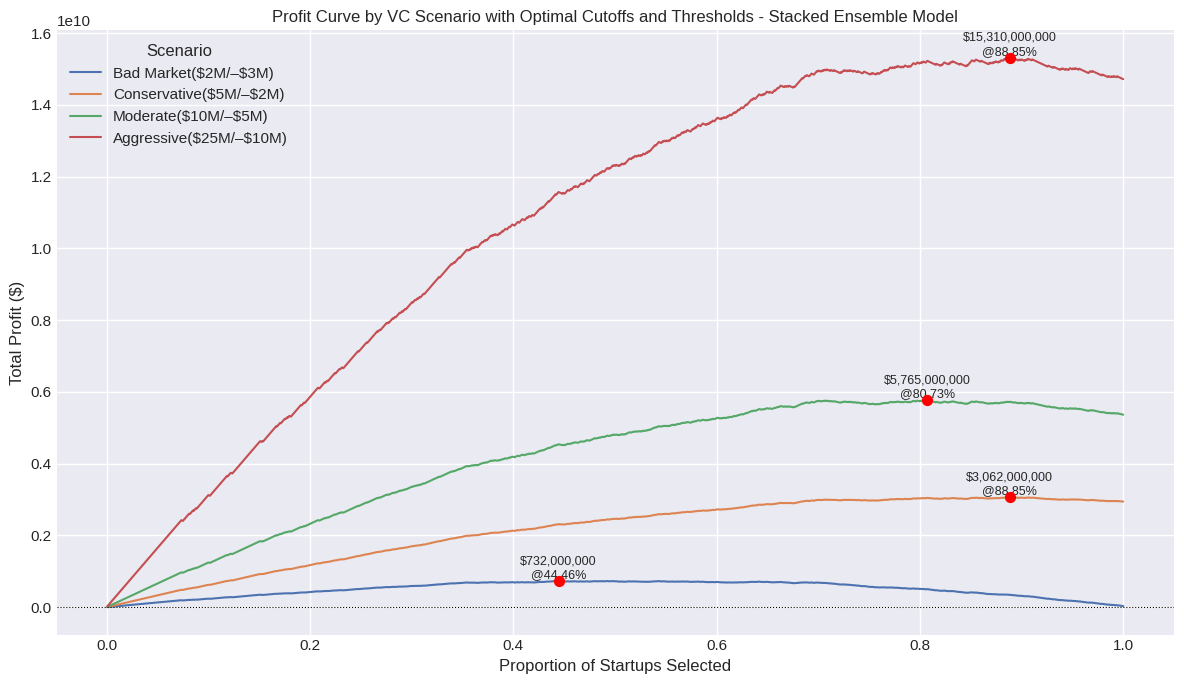

In [ ]:
# Ensure y_proba_best_rf and y_test are defined
profit_curve_df = pd.DataFrame({
    'probability': y_proba_stack_all,
    'true_label': y_test.reset_index(drop=True)
}).sort_values(by='probability', ascending=False).reset_index(drop=True)

# Define new VC scenarios: (profit if success, loss if failure)
scenarios = {
    "Bad Market(\$2M/–\$3M)": (2_000_000, -3_000_000),
    "Conservative(\$5M/–\$2M)": (5_000_000, -2_000_000),
    "Moderate(\$10M/–\$5M)": (10_000_000, -5_000_000),
    "Aggressive(\$25M/–\$10M)": (25_000_000, -10_000_000)
}

# Setup plot
plt.figure(figsize=(12, 7))
plt.title("Profit Curve by VC Scenario with Optimal Cutoffs and Thresholds - Stacked Ensemble Model")
plt.xlabel("Proportion of Startups Selected")
plt.ylabel("Total Profit ($)")

# Plot curves + annotate max points
for label, (profit_per_success, loss_per_failure) in scenarios.items():
    profits = []
    for i in range(1, len(profit_curve_df)+1):
        selected = profit_curve_df.iloc[:i]
        profit = (selected['true_label'] * profit_per_success + (1 - selected['true_label']) * loss_per_failure).sum()
        profits.append(profit)

    x_vals = np.arange(1, len(profit_curve_df)+1) / len(profit_curve_df)

    # Find optimal index
    max_idx = np.argmax(profits)
    max_profit = profits[max_idx]
    cutoff = x_vals[max_idx]

    # Plot line and point
    plt.plot(x_vals, profits, label=label)
    plt.scatter(cutoff, max_profit, color='red', s=50, zorder=5)

    # Annotate point
    plt.text(cutoff, max_profit, f"${max_profit:,}\n@{cutoff:.2%}", fontsize=9, ha='center', va='bottom')

# Add zero-profit reference line
plt.axhline(0, color='black', linestyle='dotted', linewidth=0.8)

plt.grid(True)
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()

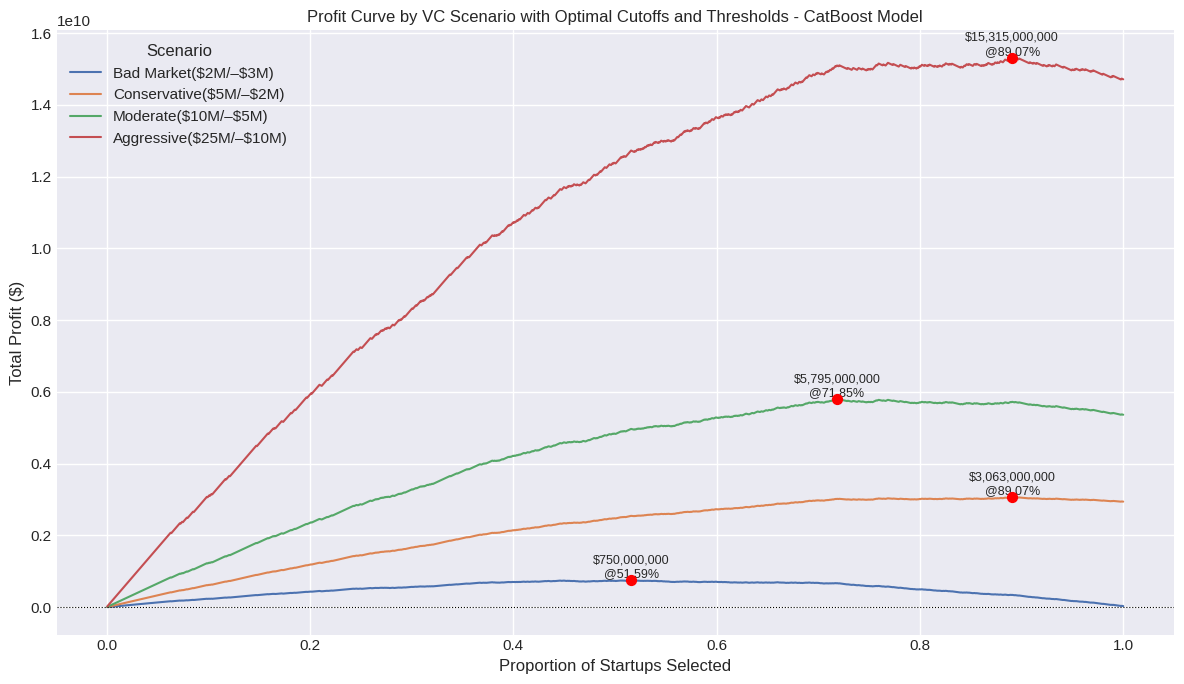

In [ ]:
# Ensure y_proba_best_rf and y_test are defined
profit_curve_df = pd.DataFrame({
    'probability': y_proba_cat,
    'true_label': y_test.reset_index(drop=True)
}).sort_values(by='probability', ascending=False).reset_index(drop=True)

# Define new VC scenarios: (profit if success, loss if failure)
scenarios = {
    "Bad Market(\$2M/–\$3M)": (2_000_000, -3_000_000),
    "Conservative(\$5M/–\$2M)": (5_000_000, -2_000_000),
    "Moderate(\$10M/–\$5M)": (10_000_000, -5_000_000),
    "Aggressive(\$25M/–\$10M)": (25_000_000, -10_000_000)
}

# Setup plot
plt.figure(figsize=(12, 7))
plt.title("Profit Curve by VC Scenario with Optimal Cutoffs and Thresholds - CatBoost Model")
plt.xlabel("Proportion of Startups Selected")
plt.ylabel("Total Profit ($)")

# Plot curves + annotate max points
for label, (profit_per_success, loss_per_failure) in scenarios.items():
    profits = []
    for i in range(1, len(profit_curve_df)+1):
        selected = profit_curve_df.iloc[:i]
        profit = (selected['true_label'] * profit_per_success + (1 - selected['true_label']) * loss_per_failure).sum()
        profits.append(profit)

    x_vals = np.arange(1, len(profit_curve_df)+1) / len(profit_curve_df)

    # Find optimal index
    max_idx = np.argmax(profits)
    max_profit = profits[max_idx]
    cutoff = x_vals[max_idx]

    # Plot line and point
    plt.plot(x_vals, profits, label=label)
    plt.scatter(cutoff, max_profit, color='red', s=50, zorder=5)

    # Annotate point
    plt.text(cutoff, max_profit, f"${max_profit:,}\n@{cutoff:.2%}", fontsize=9, ha='center', va='bottom')

# Add zero-profit reference line
plt.axhline(0, color='black', linestyle='dotted', linewidth=0.8)

plt.grid(True)
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()

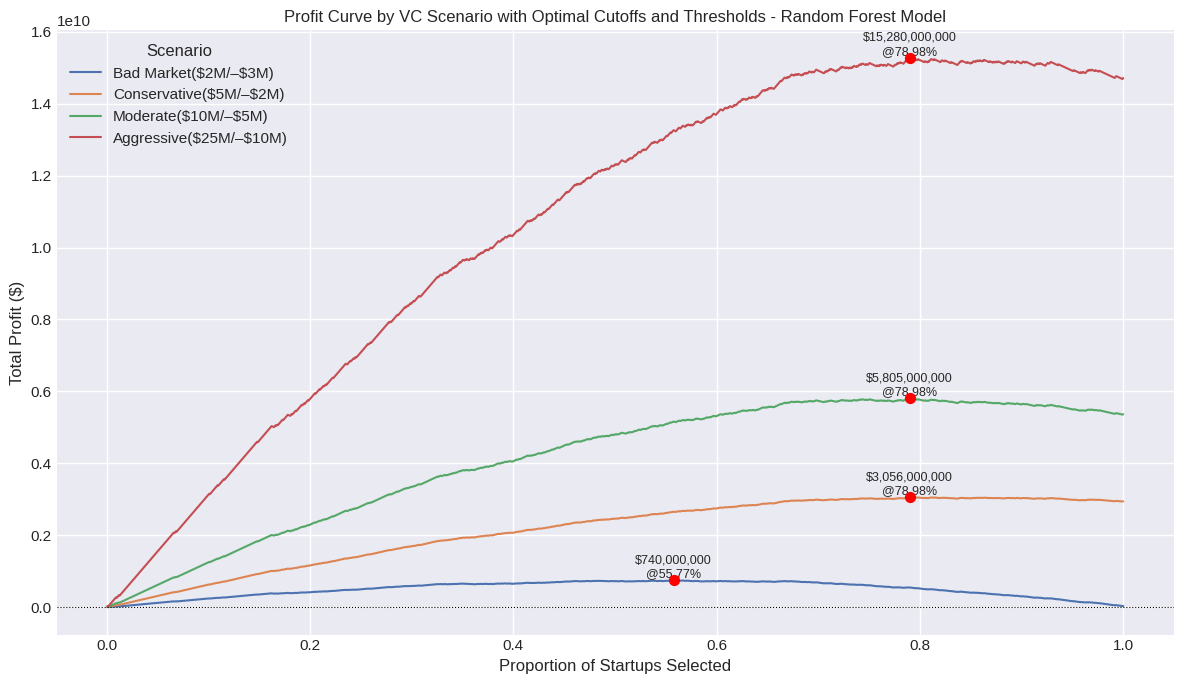

In [ ]:
# Ensure y_proba_best_rf and y_test are defined
profit_curve_df = pd.DataFrame({
    'probability': y_proba_rf,
    'true_label': y_test.reset_index(drop=True)
}).sort_values(by='probability', ascending=False).reset_index(drop=True)

# Define new VC scenarios: (profit if success, loss if failure)
scenarios = {
    "Bad Market(\$2M/–\$3M)": (2_000_000, -3_000_000),
    "Conservative(\$5M/–\$2M)": (5_000_000, -2_000_000),
    "Moderate(\$10M/–\$5M)": (10_000_000, -5_000_000),
    "Aggressive(\$25M/–\$10M)": (25_000_000, -10_000_000)
}

# Setup plot
plt.figure(figsize=(12, 7))
plt.title("Profit Curve by VC Scenario with Optimal Cutoffs and Thresholds - Random Forest Model")
plt.xlabel("Proportion of Startups Selected")
plt.ylabel("Total Profit ($)")

# Plot curves + annotate max points
for label, (profit_per_success, loss_per_failure) in scenarios.items():
    profits = []
    for i in range(1, len(profit_curve_df)+1):
        selected = profit_curve_df.iloc[:i]
        profit = (selected['true_label'] * profit_per_success + (1 - selected['true_label']) * loss_per_failure).sum()
        profits.append(profit)

    x_vals = np.arange(1, len(profit_curve_df)+1) / len(profit_curve_df)

    # Find optimal index
    max_idx = np.argmax(profits)
    max_profit = profits[max_idx]
    cutoff = x_vals[max_idx]

    # Plot line and point
    plt.plot(x_vals, profits, label=label)
    plt.scatter(cutoff, max_profit, color='red', s=50, zorder=5)

    # Annotate point
    plt.text(cutoff, max_profit, f"${max_profit:,}\n@{cutoff:.2%}", fontsize=9, ha='center', va='bottom')

# Add zero-profit reference line
plt.axhline(0, color='black', linestyle='dotted', linewidth=0.8)

plt.grid(True)
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()

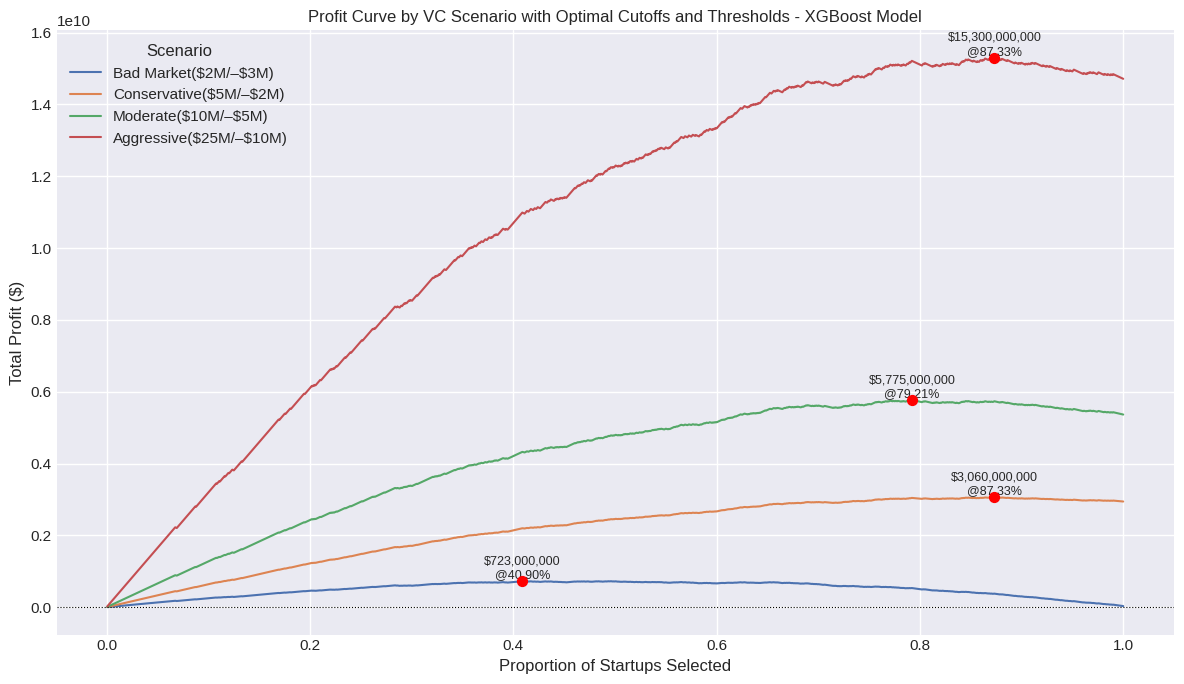

In [ ]:
# Ensure y_proba_best_rf and y_test are defined
profit_curve_df = pd.DataFrame({
    'probability': y_proba_xgb,
    'true_label': y_test.reset_index(drop=True)
}).sort_values(by='probability', ascending=False).reset_index(drop=True)

# Define new VC scenarios: (profit if success, loss if failure)
scenarios = {
    "Bad Market(\$2M/–\$3M)": (2_000_000, -3_000_000),
    "Conservative(\$5M/–\$2M)": (5_000_000, -2_000_000),
    "Moderate(\$10M/–\$5M)": (10_000_000, -5_000_000),
    "Aggressive(\$25M/–\$10M)": (25_000_000, -10_000_000)
}

# Setup plot
plt.figure(figsize=(12, 7))
plt.title("Profit Curve by VC Scenario with Optimal Cutoffs and Thresholds - XGBoost Model")
plt.xlabel("Proportion of Startups Selected")
plt.ylabel("Total Profit ($)")

# Plot curves + annotate max points
for label, (profit_per_success, loss_per_failure) in scenarios.items():
    profits = []
    for i in range(1, len(profit_curve_df)+1):
        selected = profit_curve_df.iloc[:i]
        profit = (selected['true_label'] * profit_per_success + (1 - selected['true_label']) * loss_per_failure).sum()
        profits.append(profit)

    x_vals = np.arange(1, len(profit_curve_df)+1) / len(profit_curve_df)

    # Find optimal index
    max_idx = np.argmax(profits)
    max_profit = profits[max_idx]
    cutoff = x_vals[max_idx]

    # Plot line and point
    plt.plot(x_vals, profits, label=label)
    plt.scatter(cutoff, max_profit, color='red', s=50, zorder=5)

    # Annotate point
    plt.text(cutoff, max_profit, f"${max_profit:,}\n@{cutoff:.2%}", fontsize=9, ha='center', va='bottom')

# Add zero-profit reference line
plt.axhline(0, color='black', linestyle='dotted', linewidth=0.8)

plt.grid(True)
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()

# **12. Conclusion**

This project successfully developed and evaluated several machine learning models to predict startup success, defined as either acquisition or successful IPO.  We explored various models, including Logistic Regression, Decision Trees, Random Forests, XGBoost, LightGBM, CatBoost, a fine-tuned Random Forest, and a stacking ensemble of all base models.  Model performance was rigorously assessed using metrics such as Accuracy, Precision, Recall, F1-Score, and AUC.  The fine-tuned Random Forest model demonstrated the highest AUC score, indicating superior predictive performance in distinguishing successful startups from unsuccessful ones.

Further analysis using profit curves, considering various investment scenarios, revealed the optimal investment strategy for maximizing returns. The analysis identified an optimal investment threshold that balances risk and reward, offering practical guidance for venture capitalists to allocate resources efficiently.

# **13. Business Insights**

1. **Predictive Power:** Our best models offer a significant improvement over random guessing, enabling Sequoia Capital to identify promising startups with higher confidence.

2. **Optimal Investment Strategy:**  The profit curve analysis translates model predictions into actionable investment strategies. Rather than investing uniformly across all startups, our findings recommend focusing resources on the top X% of predicted successful startups, maximizing returns. The optimal percentage depends heavily on the risk appetite of the VC, which has been visualized with different scenarios.

3. **Key Success Drivers:** Feature importance analysis highlights crucial factors contributing to startup success. These include years since founding, total funding, the number of funding rounds, the industry group and the country of origin. Understanding these factors can inform investment decisions and guide portfolio diversification.

4. **Country and Industry Focus:**  Certain countries and industry groups exhibit higher success rates. While the model does not discriminate against other geographies and sectors, these findings can support targeted investment initiatives in these specific areas.

5. **Dynamic Investment Threshold:** The optimal investment threshold is not static and depends on the specific profit/loss associated with each investment decision.  The analysis shows how the threshold shifts across several realistic VC investment scenarios.

# **14. Recommendations**

* **Deploy the Fine-tuned Random Forest Model:** Due to its superior predictive performance as measured by AUC, we recommend employing the fine-tuned Random Forest model for ongoing startup evaluations.
* **Incorporate Dynamic Thresholds:**  Implement a dynamic investment threshold based on the risk and profit/loss scenarios and utilize the profit curves as a decision-making tool.
* **Continuous Monitoring and Model Refinement:** Regularly update the model with new data to ensure its accuracy remains high in a constantly evolving market. Re-evaluate the features and hyperparameters when new data is added to maintain predictive accuracy.
* **Qualitative Assessment:** While the models provide valuable quantitative insights, it is crucial for Sequoia Capital to supplement these predictions with thorough qualitative analysis, taking into account factors like management team quality, market trends, and competitive landscape.
* **Integrate with existing workflows:** Incorporate these findings into the existing workflows for evaluating startup potential and prioritize funding candidates using these insights.